In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Analiza dla akcelerometru

In [41]:
acc_x = np.loadtxt('/Users/paulinawor/Documents/konkurs/Hips/Acc_x.txt')
acc_y = np.loadtxt('/Users/paulinawor/Documents/konkurs/Hips/Acc_y.txt')
acc_z = np.loadtxt('/Users/paulinawor/Documents/konkurs/Hips/Acc_z.txt')

In [42]:
print(acc_x.shape, acc_y.shape, acc_z.shape)

(28789, 500) (28789, 500) (28789, 500)


In [43]:
acc = np.stack([acc_x, acc_y, acc_z], axis=1)
print(acc.shape)

(28789, 3, 500)


In [44]:
labels_path = np.loadtxt('/Users/paulinawor/Documents/konkurs/Hips/Label.txt', dtype=int)
labels= labels_path[:, 0]
labels_series = pd.Series(labels)
unique_labels = labels_series.unique()
print(unique_labels)

[3 2 1 6 4 7 8 5]


    1: Still (stanie/siedzenie)
    2: Walk (chodzenie)
    3: Run (bieganie)
    4: Bike (rower)
    5: Car (samochód)
    6: Bus (autobus)
    7: Train (pociąg)
    8: Subway (metro)

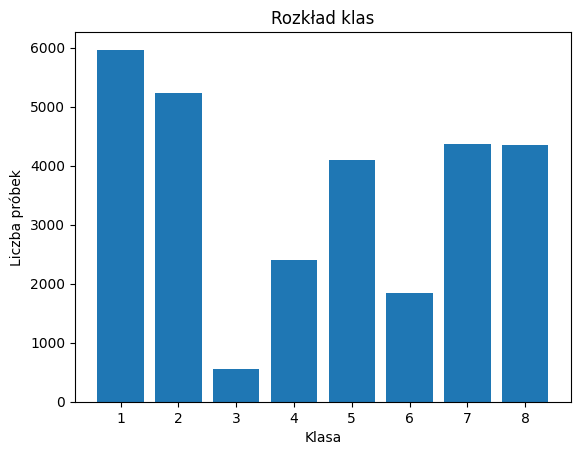

In [45]:
classes, counts = np.unique(labels, return_counts=True)
plt.bar(classes, counts)
plt.xticks(classes)
plt.xlabel("Klasa")
plt.ylabel("Liczba próbek")
plt.title("Rozkład klas")
plt.show()

In [46]:
label_names = {
    1: 'Still (stanie/siedzenie)',
    2: 'Walk (chodzenie)',
    3: 'Run (bieganie)',
    4: 'Bike (rower)',
    5: 'Car (samochód)',
    6: 'Bus (autobus)',
    7: 'Train (pociąg)',
    8: 'Subway (metro)',
}


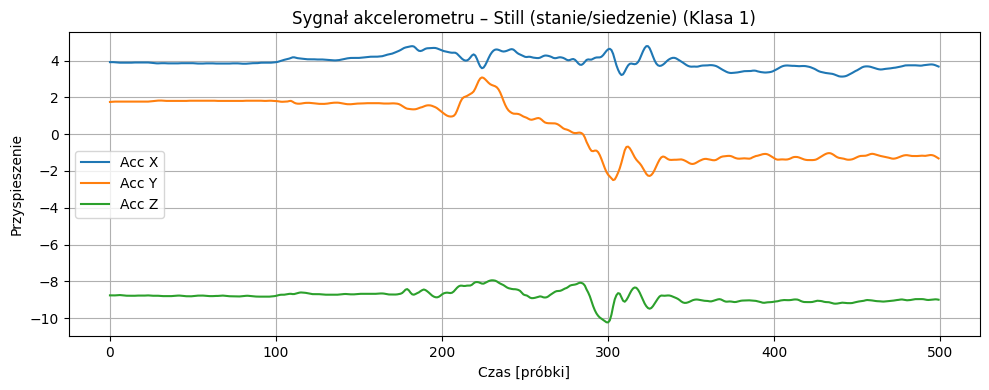

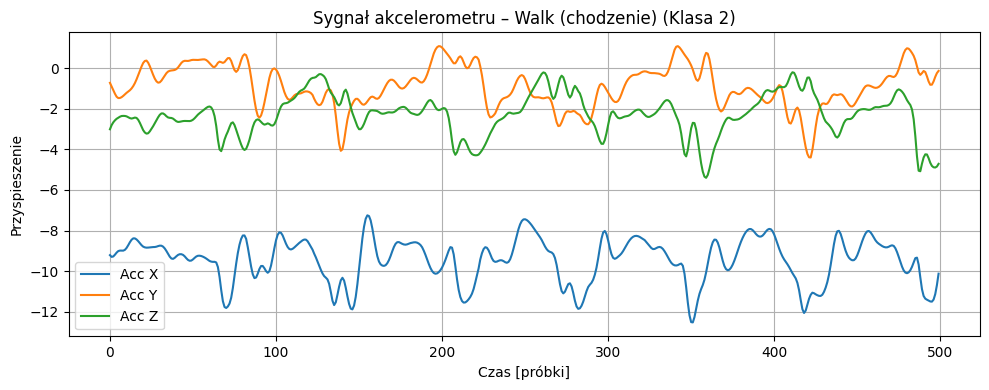

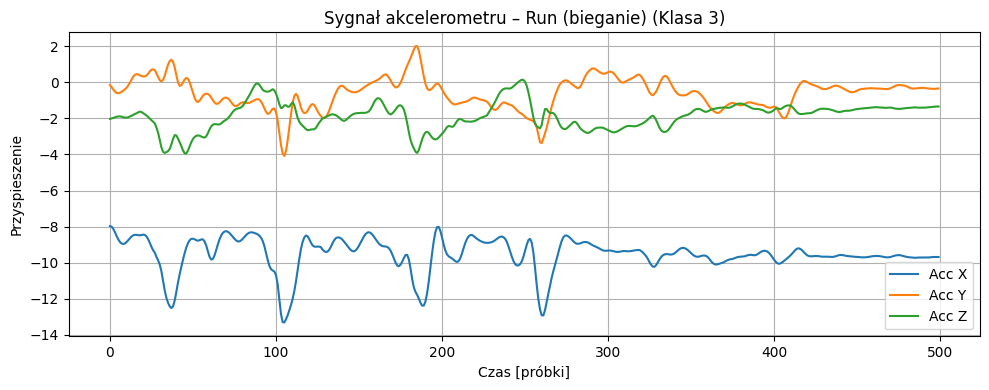

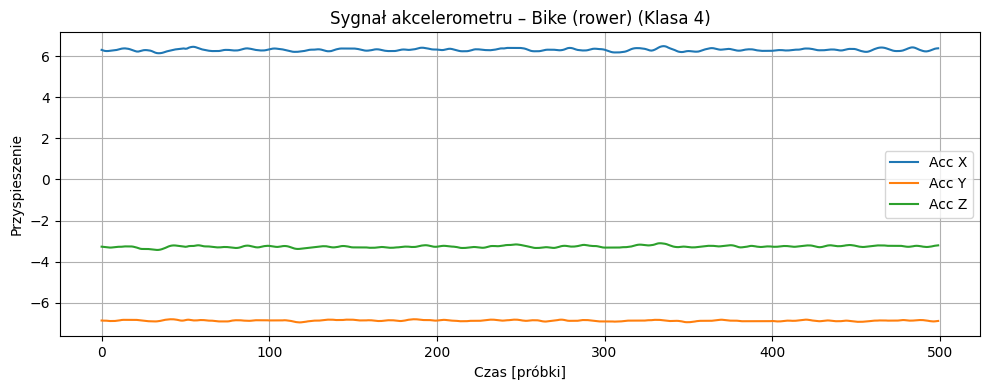

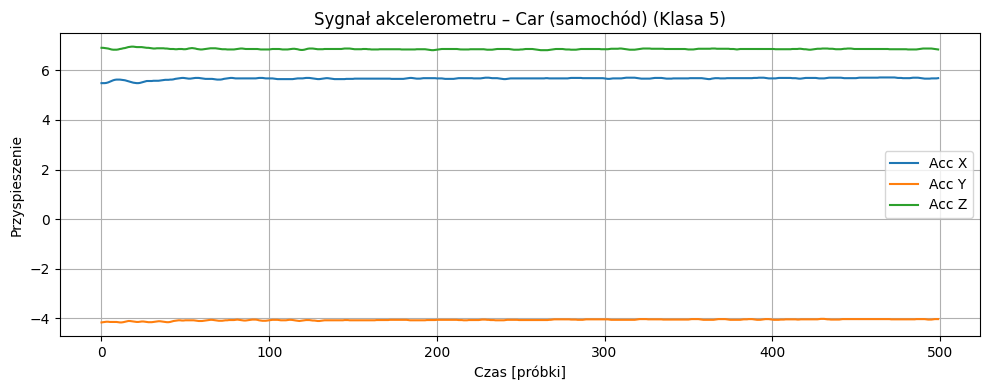

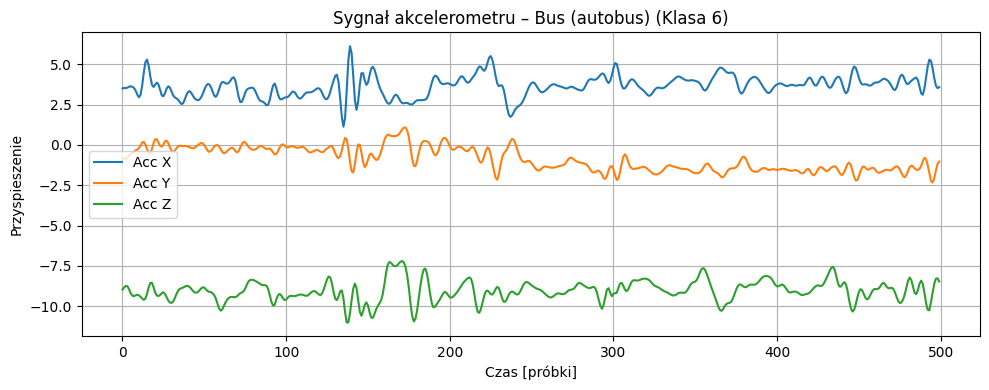

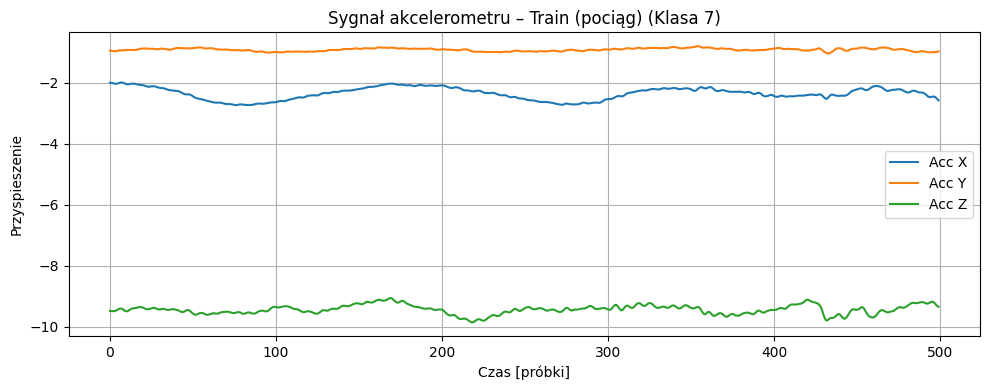

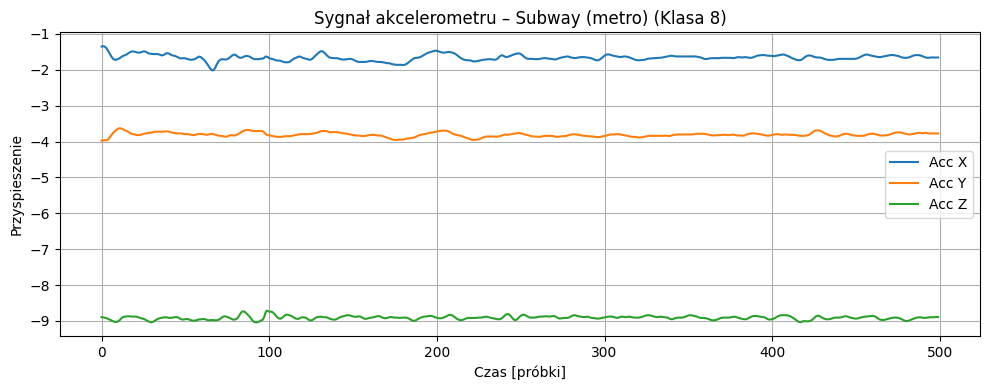

In [47]:
class_indices = {}
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]    
    idx = indices[0]
    sample = acc[idx]

    plt.figure(figsize=(10, 4))
    plt.plot(sample[0], label='Acc X')
    plt.plot(sample[1], label='Acc Y')
    plt.plot(sample[2], label='Acc Z')
    activity_name = label_names.get(class_label, f"Klasa {class_label}")
    plt.title(f'Sygnał akcelerometru – {activity_name} (Klasa {class_label})')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Przyspieszenie')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


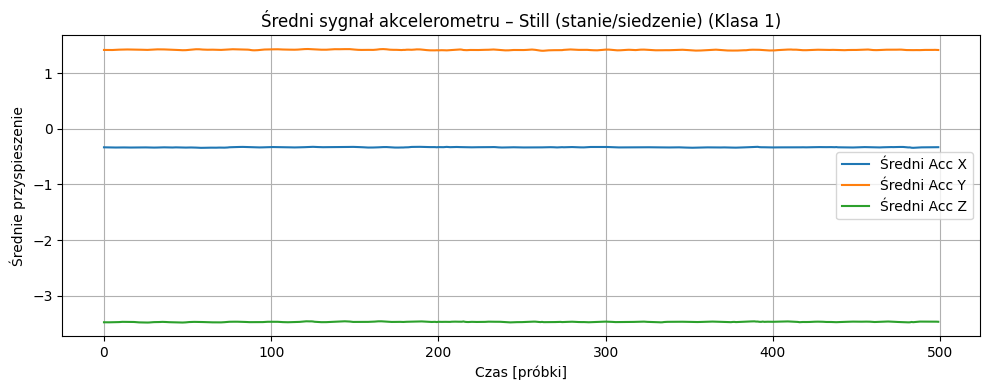

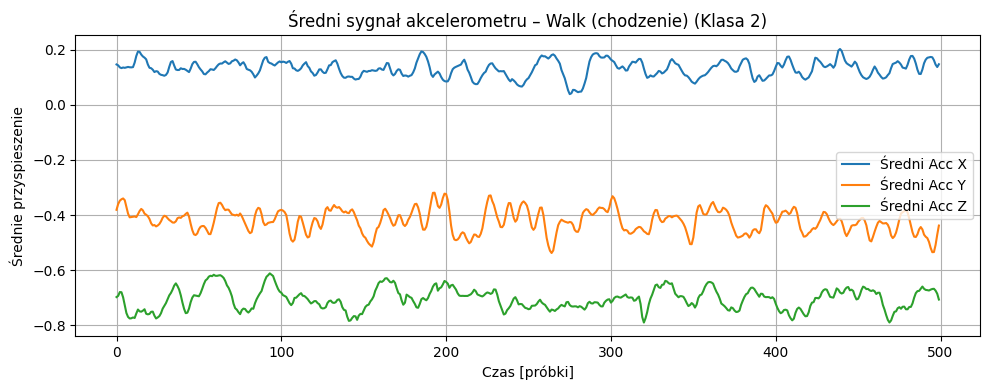

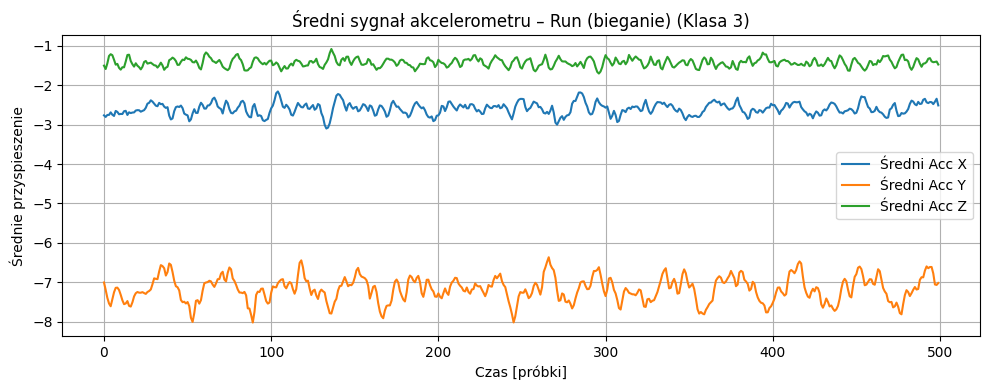

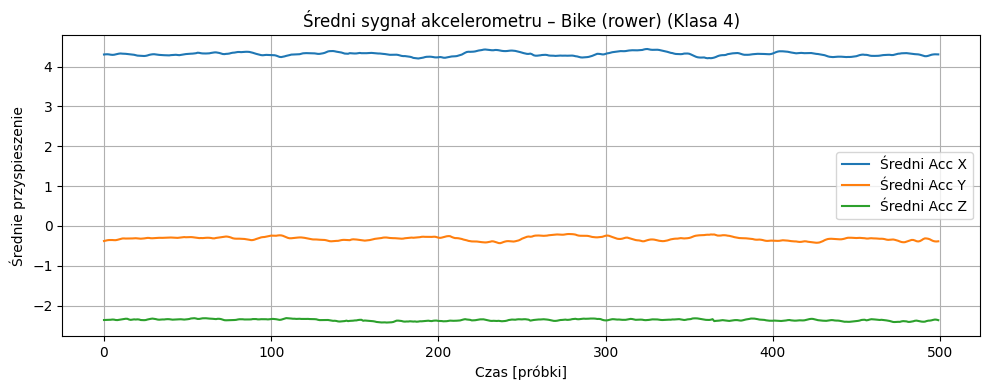

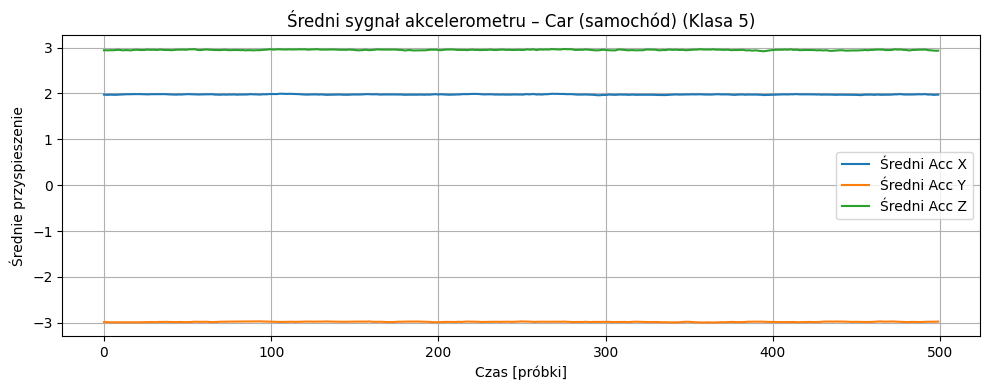

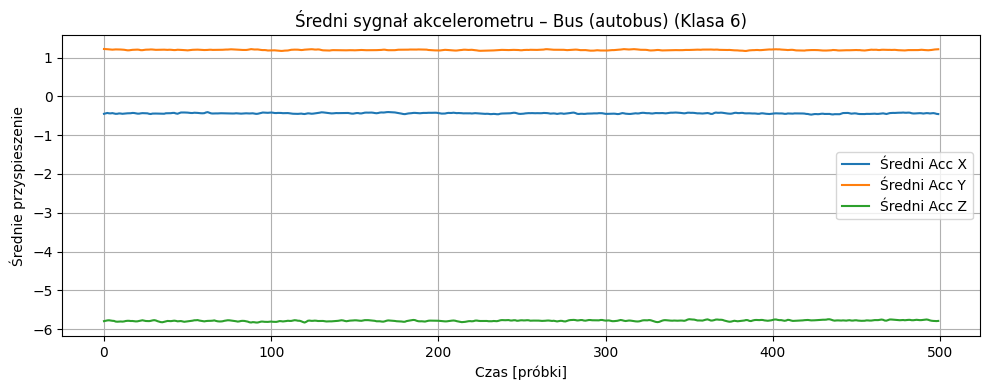

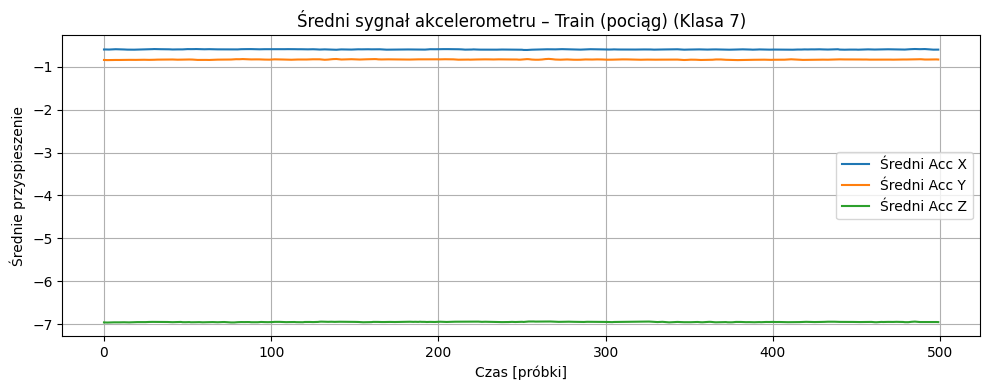

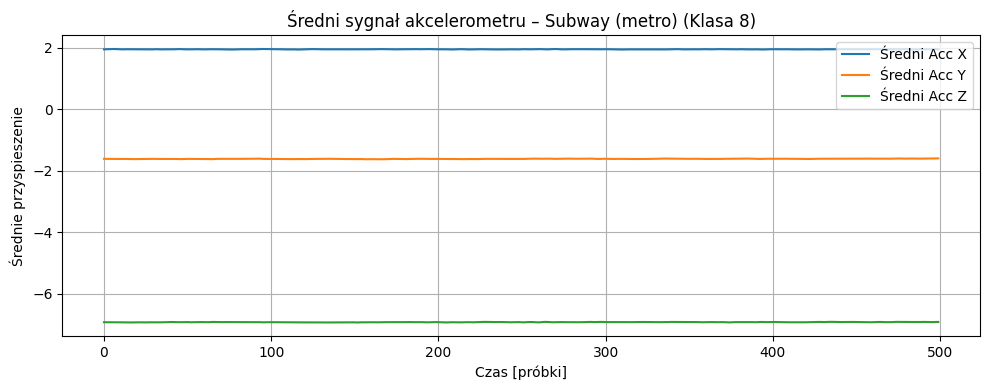

In [48]:
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]
    class_samples=acc[indices]
    mean_signal = np.mean(class_samples, axis=0)
    std_signal = np.std(class_samples, axis=0)
    activity_name = label_names.get(class_label, f"Klasa {class_label}")
    plt.figure(figsize=(10, 4))
    plt.plot(mean_signal[0], label='Średni Acc X')
    plt.plot(mean_signal[1], label='Średni Acc Y')
    plt.plot(mean_signal[2], label='Średni Acc Z')
    plt.title(f'Średni sygnał akcelerometru – {activity_name} (Klasa {class_label})')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Średnie przyspieszenie')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


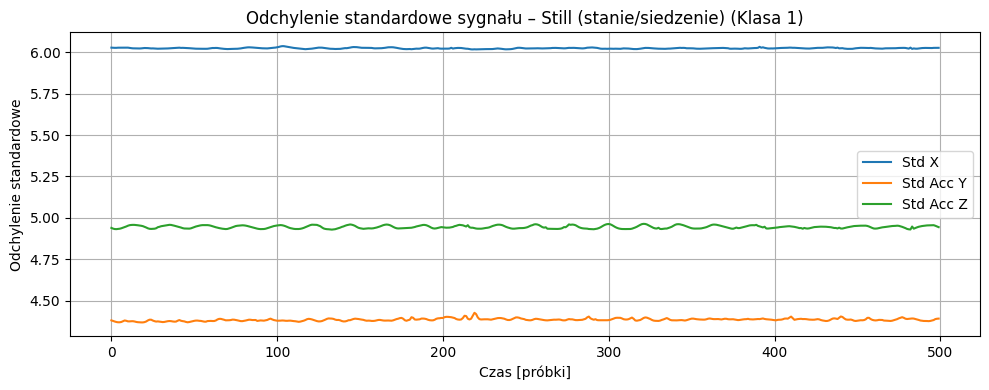

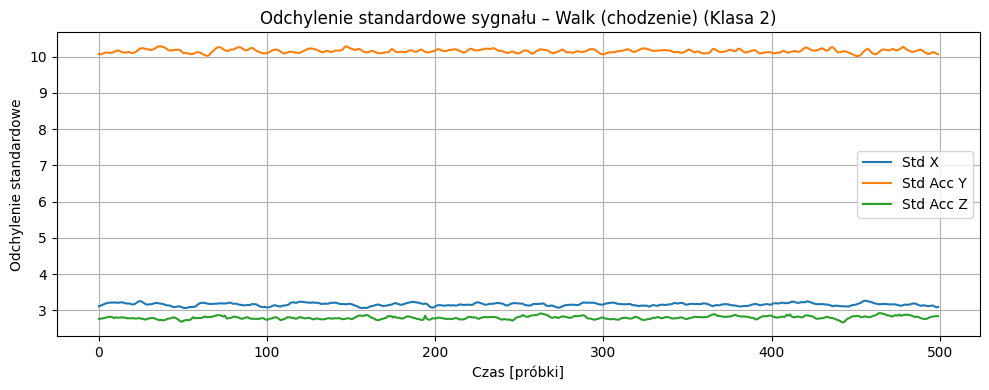

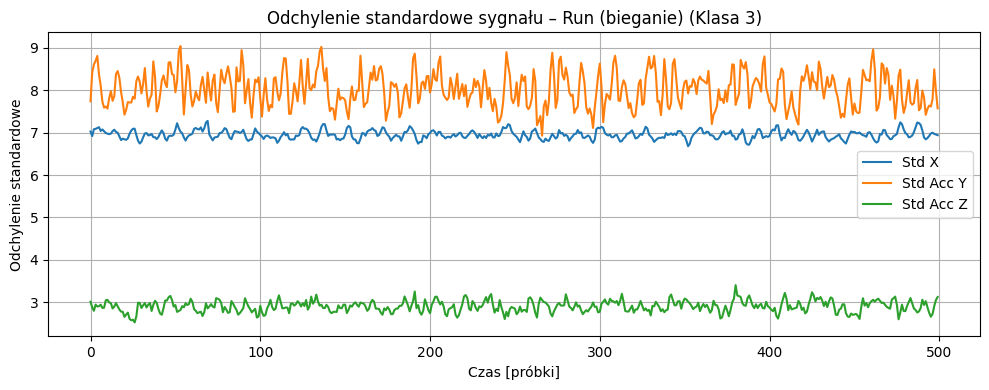

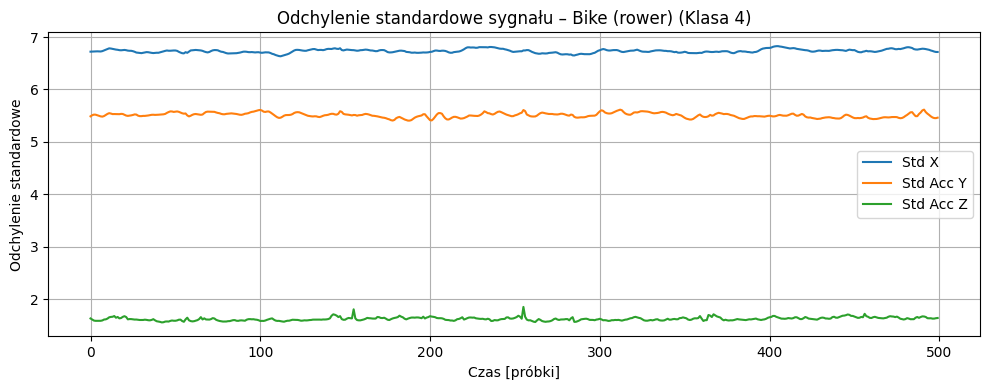

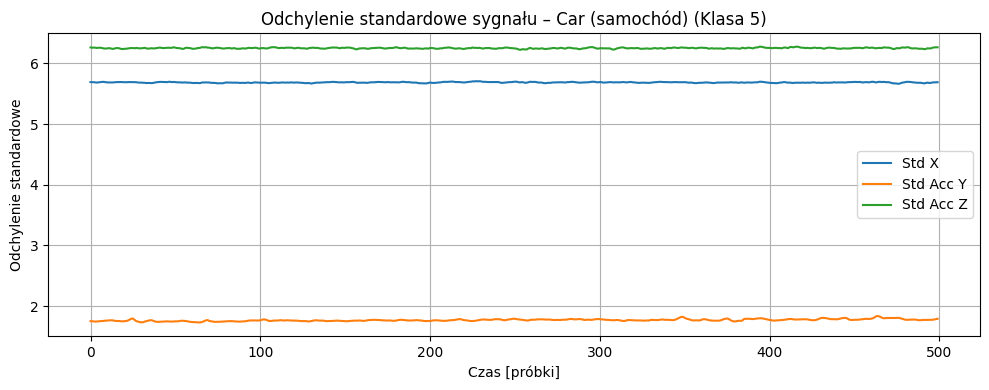

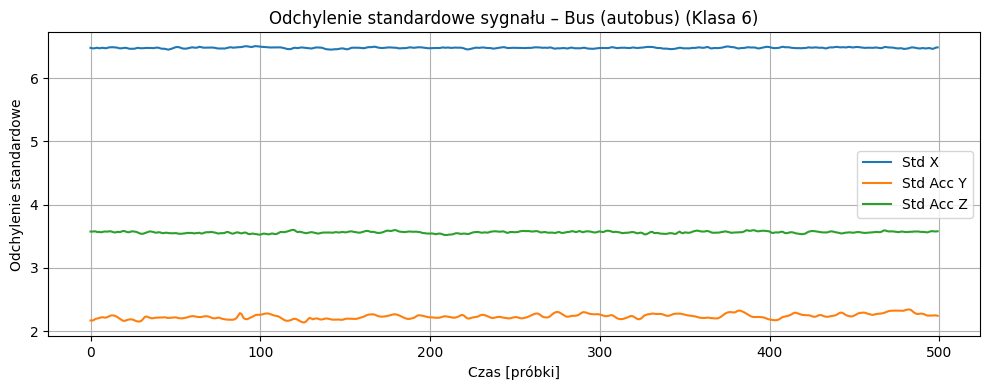

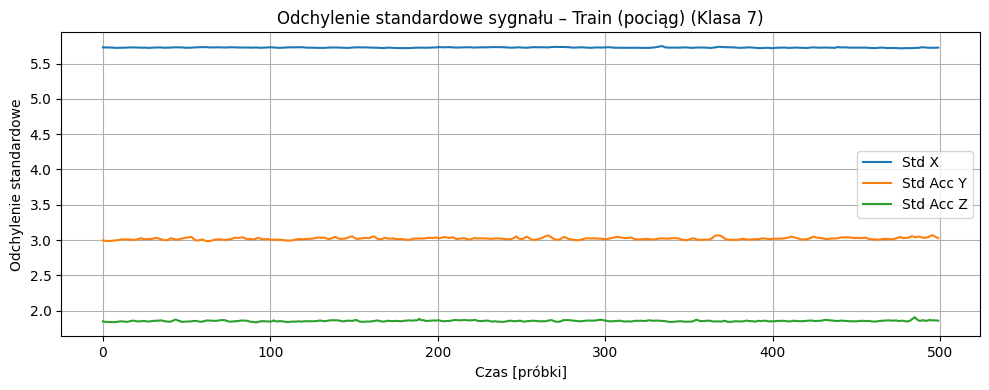

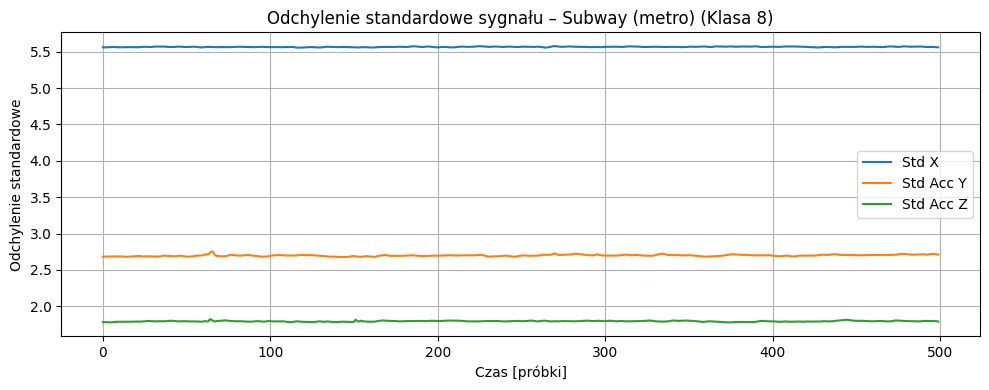

In [49]:
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]
    class_samples=acc[indices]
    mean_signal = np.mean(class_samples, axis=0)
    std_signal = np.std(class_samples, axis=0)
    activity_name = label_names.get(class_label, f"Klasa {class_label}")  
    
    plt.figure(figsize=(10, 4))
    plt.plot(std_signal[0], label='Std X')
    plt.plot(std_signal[1], label='Std Acc Y')
    plt.plot(std_signal[2], label='Std Acc Z')
    plt.title(f'Odchylenie standardowe sygnału – {activity_name} (Klasa {class_label})')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Odchylenie standardowe')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

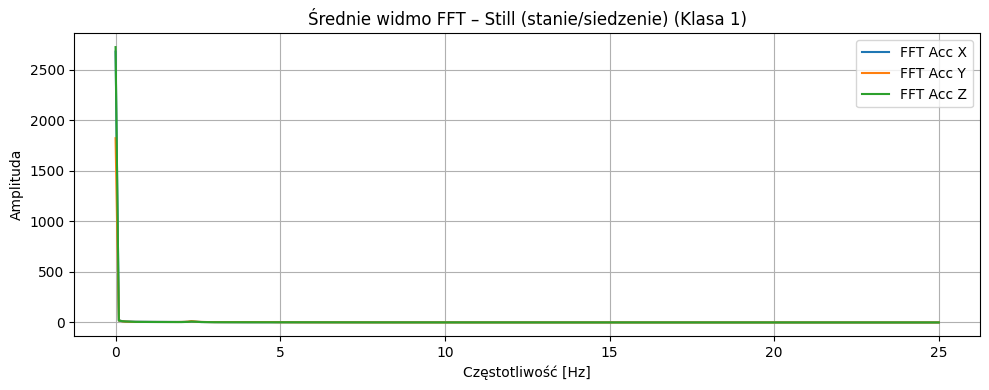

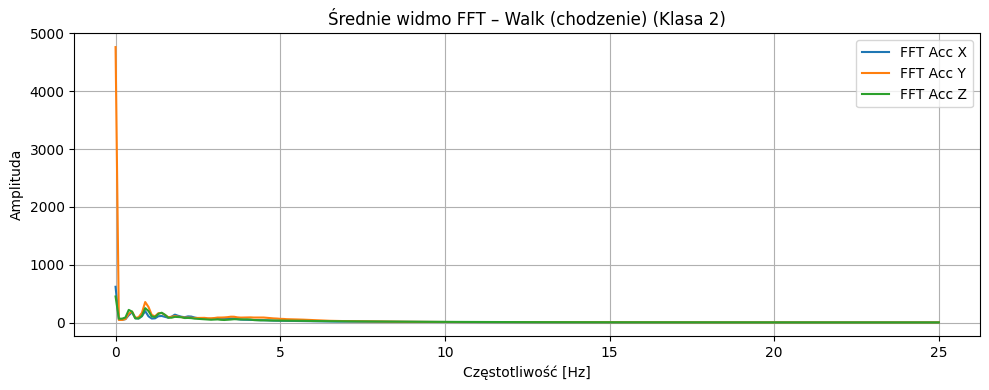

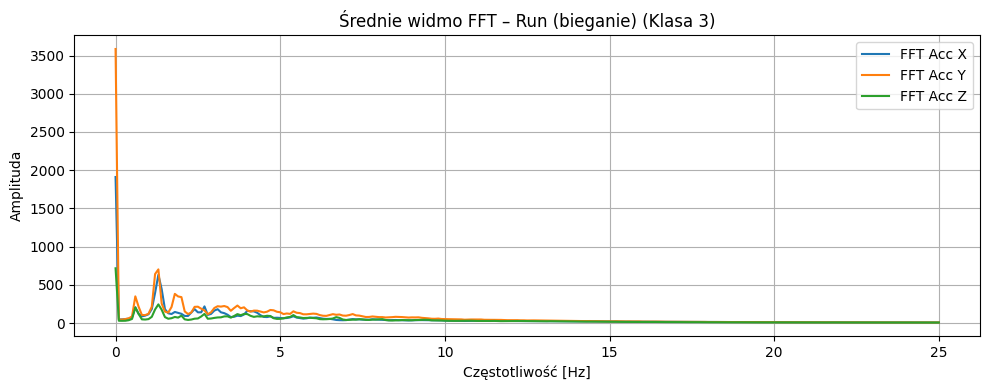

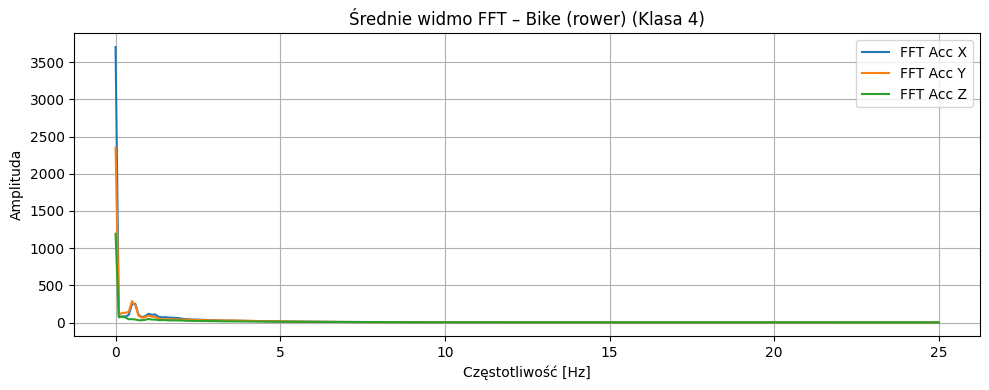

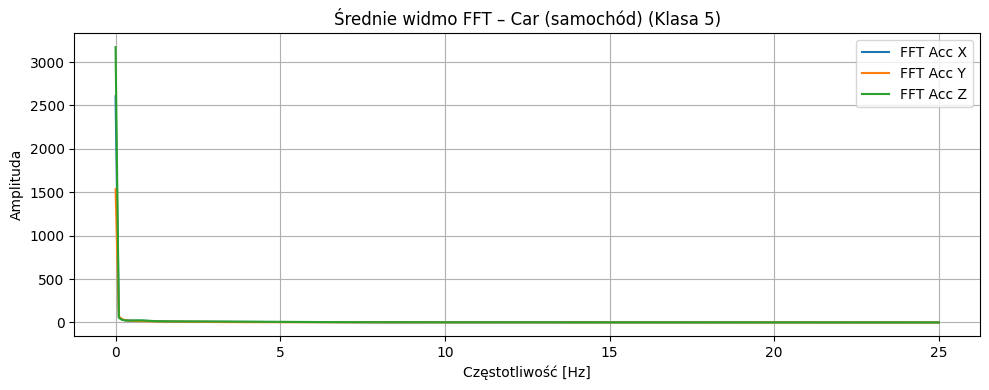

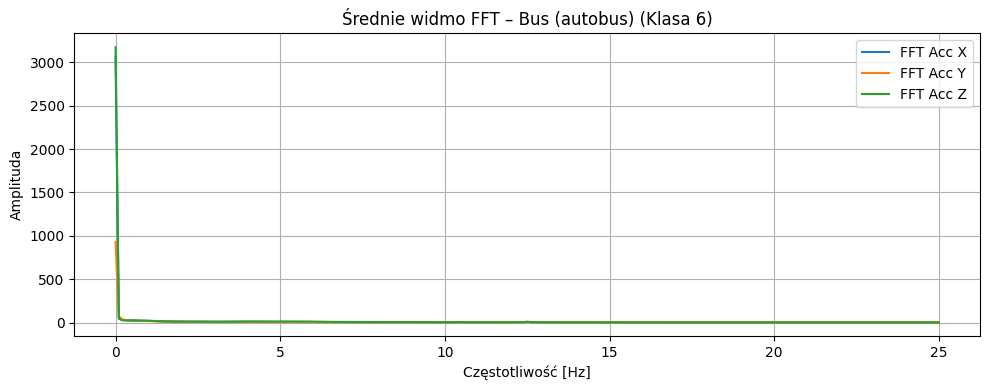

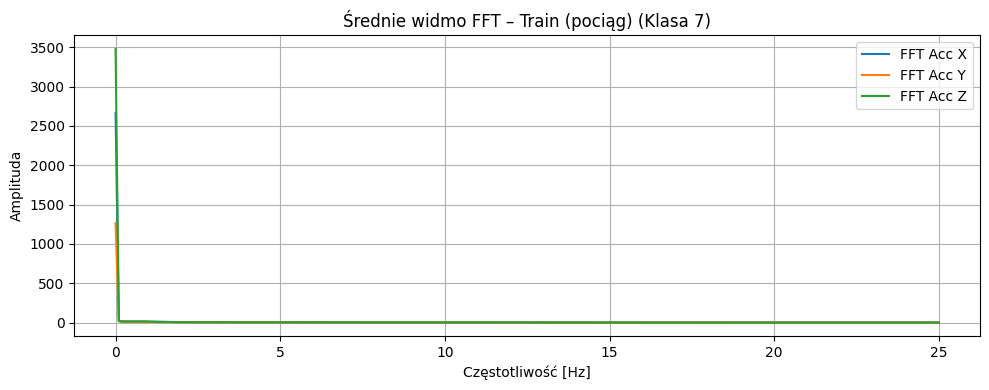

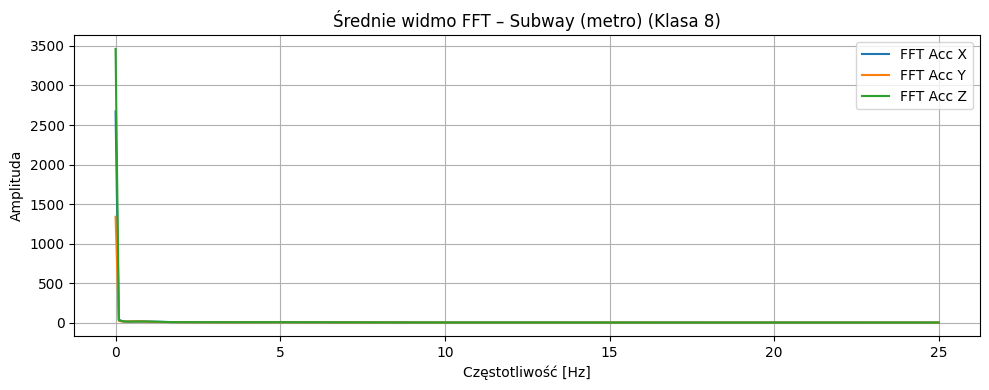

In [50]:
from scipy.fft import rfft, rfftfreq
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 50  # Hz – przykładowo
N = acc.shape[2]    # liczba próbek czasowych (500)

freqs = rfftfreq(N, d=1/sampling_rate)  


for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]
    if len(indices) == 0:
        continue

    class_samples = acc[indices] 
    fft_magnitudes = []

    for sample in class_samples:
        axis_ffts = []
        for axis_signal in sample:  
            fft_vals = np.abs(rfft(axis_signal)) 
            axis_ffts.append(fft_vals)
        fft_magnitudes.append(axis_ffts)

    fft_magnitudes = np.array(fft_magnitudes)  
    mean_fft = np.mean(fft_magnitudes, axis=0) 

    plt.figure(figsize=(10, 4))
    axes = ['X', 'Y', 'Z']
    for i in range(3):
        plt.plot(freqs, mean_fft[i], label=f'FFT Acc {axes[i]}')
    
    plt.title(f'Średnie widmo FFT – {label_names[class_label]} (Klasa {class_label})')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

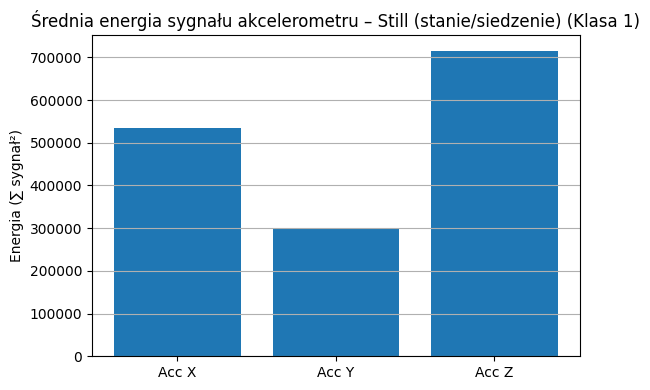

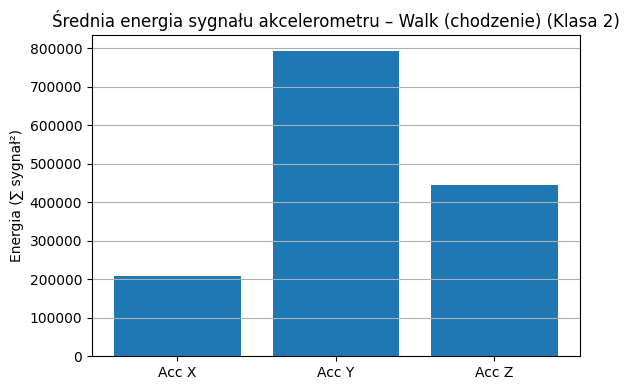

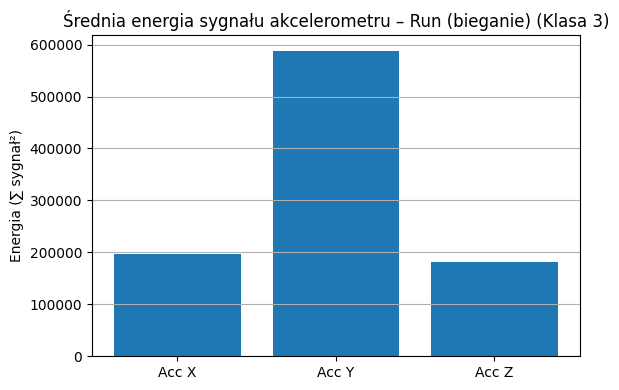

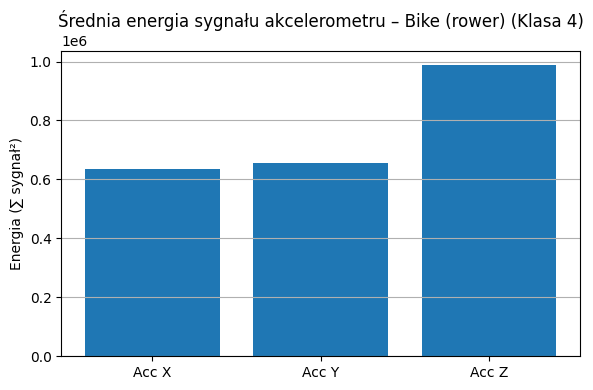

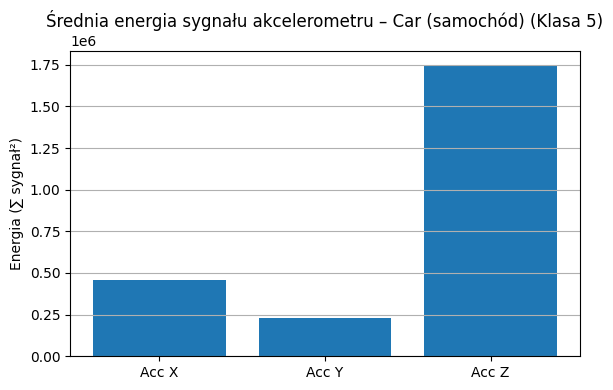

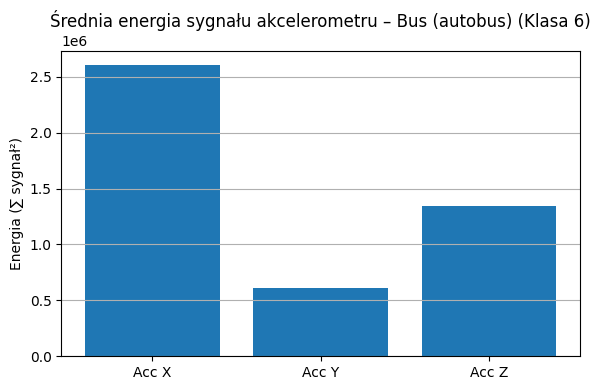

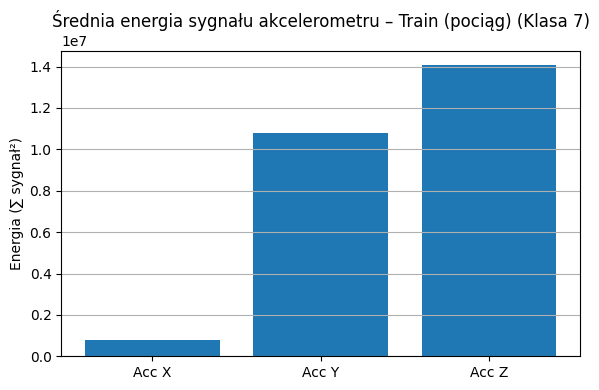

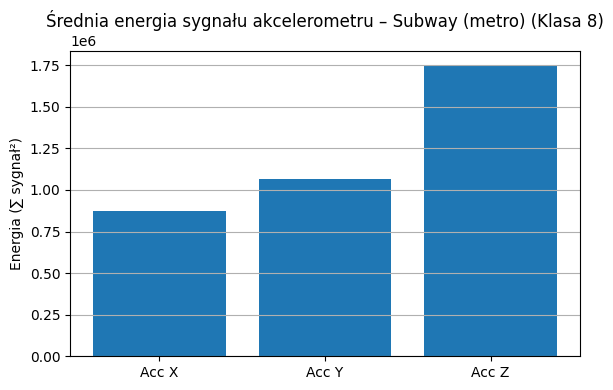

In [51]:
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]    
    class_samples = mag[indices]  

    energies = []
    for axis in range(3): 
        axis_signals = class_samples[:, axis, :] 
        axis_energy = np.sum(axis_signals ** 2, axis=1)  # energia dla każdej próbki
        mean_energy = np.mean(axis_energy)
        energies.append(mean_energy)

    activity_name = label_names.get(class_label, f"Klasa {class_label}")
    
    plt.figure(figsize=(6, 4))
    plt.bar(['Acc X', 'Acc Y', 'Acc Z'], energies)
    plt.title(f'Średnia energia sygnału akcelerometru – {activity_name} (Klasa {class_label})')
    plt.ylabel('Energia (∑ sygnał²)')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# Analiza dla żyroskopu 

In [52]:
Gyr_x = np.loadtxt('/Users/paulinawor/Documents/konkurs/Hips/Gyr_x.txt')
Gyr_y = np.loadtxt('/Users/paulinawor/Documents/konkurs/Hips/Gyr_y.txt')
Gyr_z = np.loadtxt('/Users/paulinawor/Documents/konkurs/Hips/Gyr_z.txt')

gyr = np.stack([Gyr_x, Gyr_y, Gyr_z], axis=1)

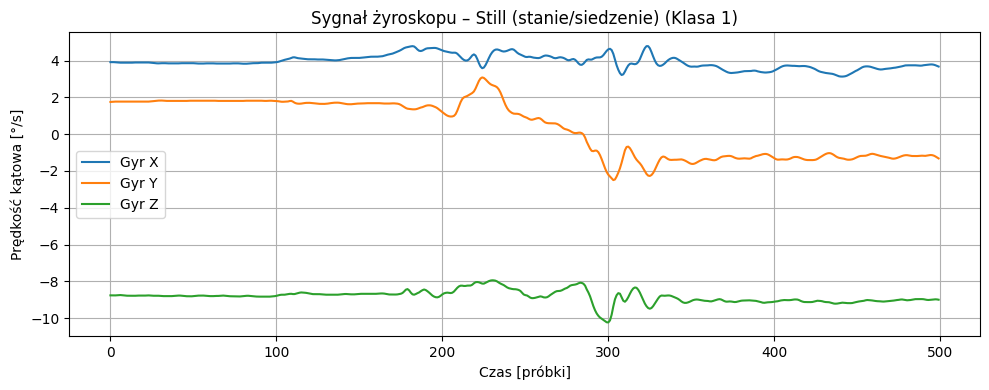

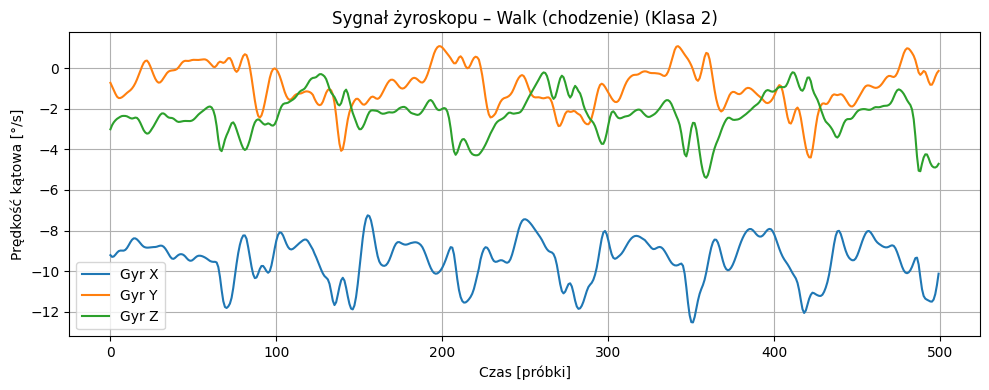

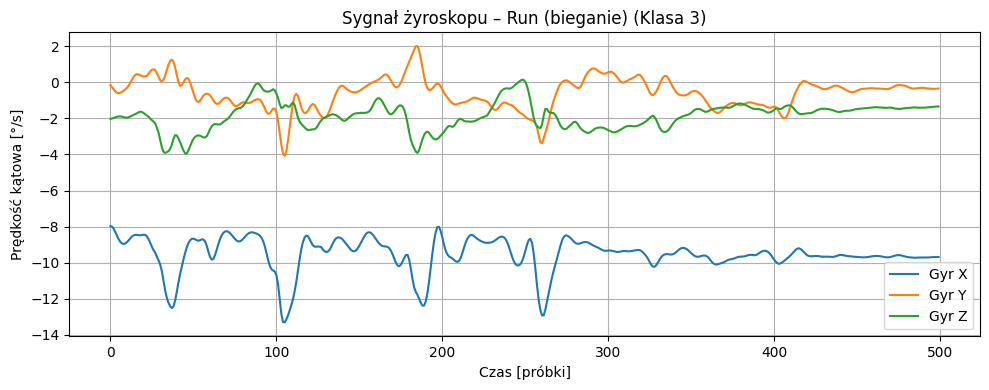

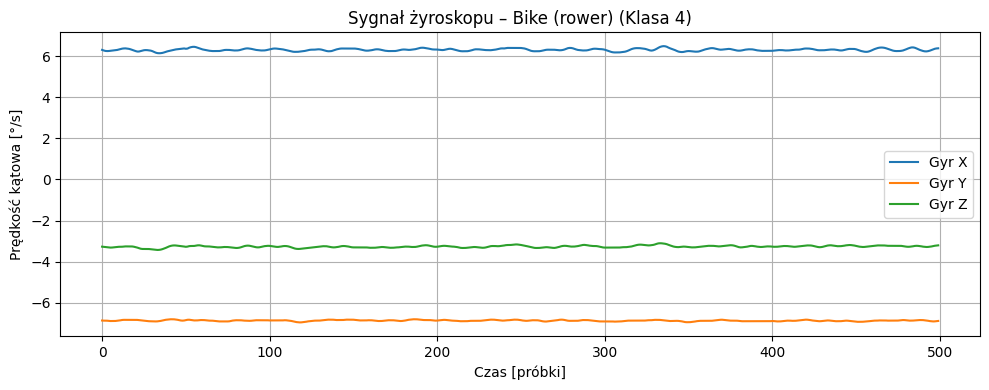

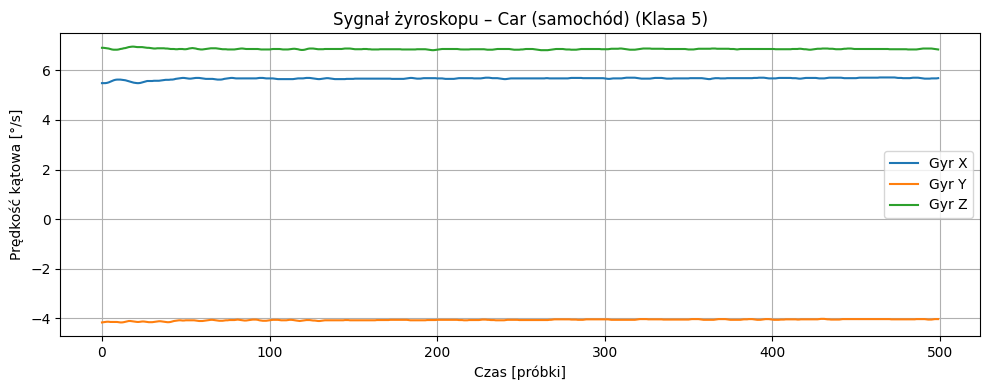

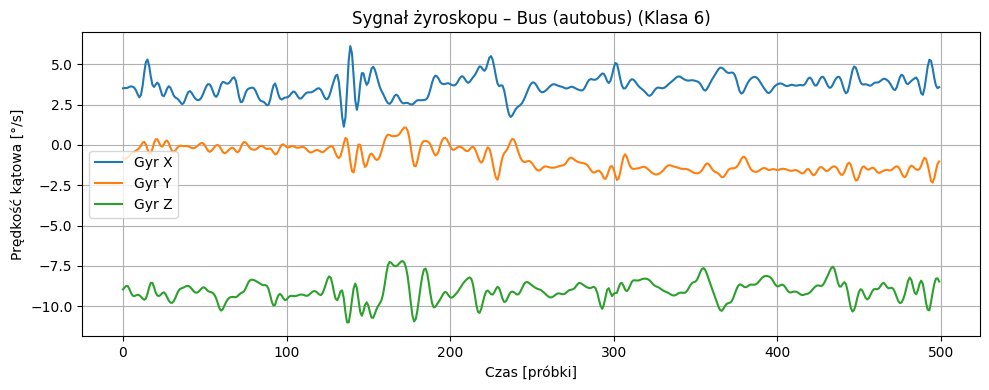

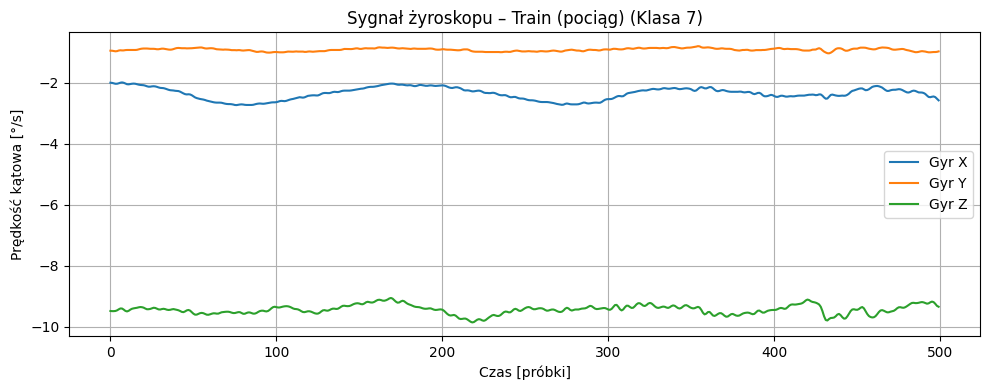

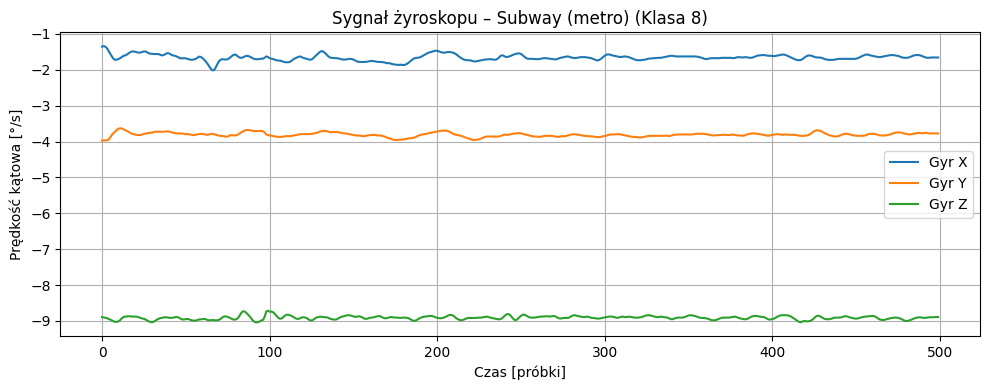

In [53]:
class_indices = {}
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]    
    idx = indices[0]
    sample = acc[idx]

    plt.figure(figsize=(10, 4))
    plt.plot(sample[0], label='Gyr X')
    plt.plot(sample[1], label='Gyr Y')
    plt.plot(sample[2], label='Gyr Z')
    activity_name = label_names.get(class_label, f"Klasa {class_label}")
    plt.title(f'Sygnał żyroskopu – {activity_name} (Klasa {class_label})')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Prędkość kątowa [°/s]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

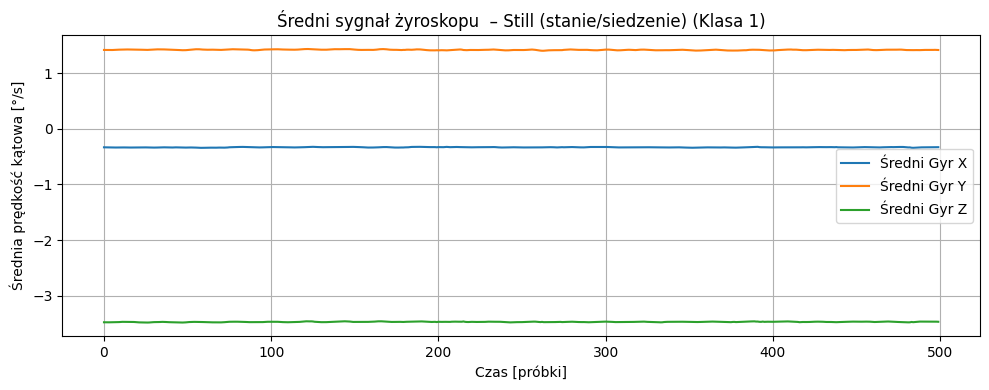

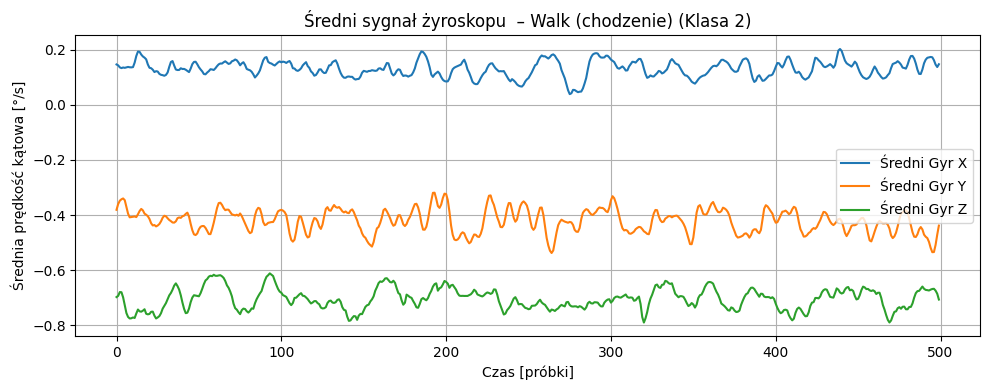

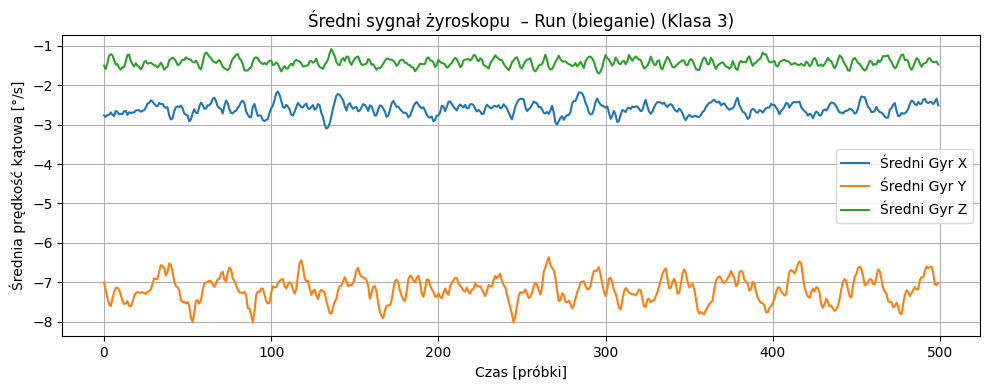

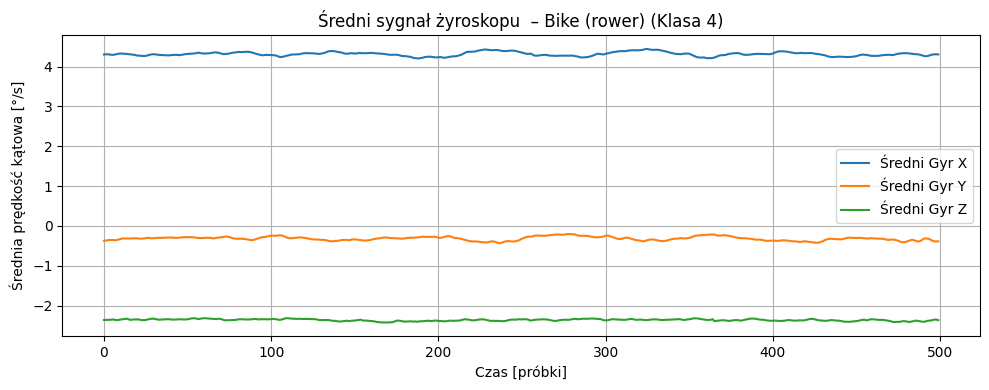

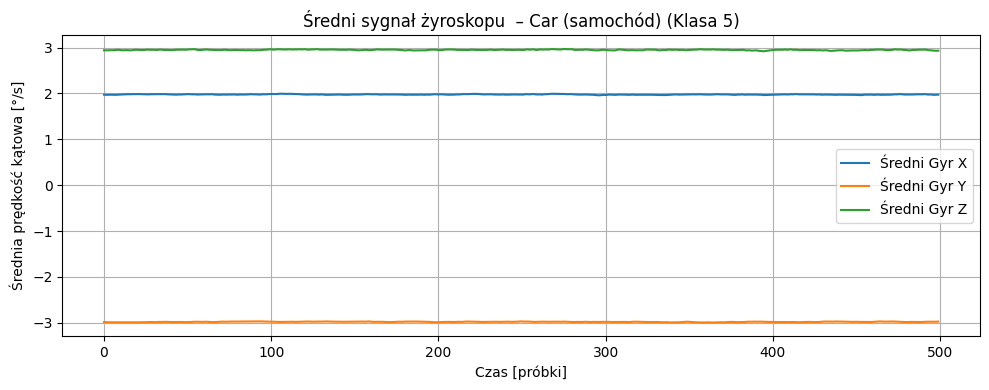

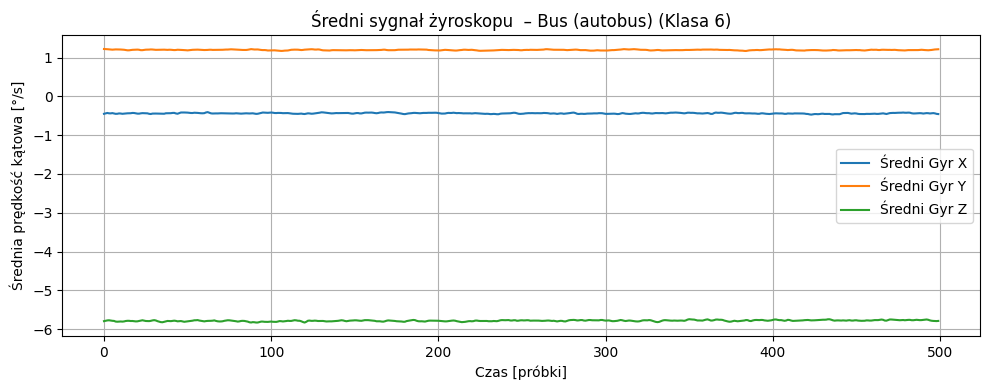

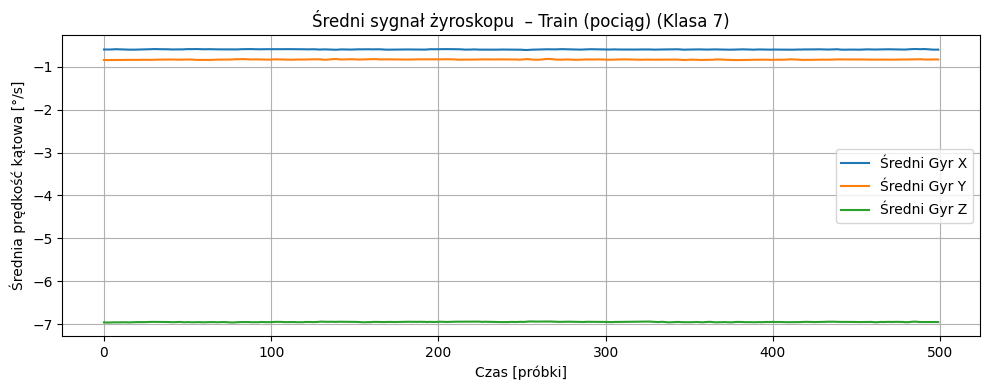

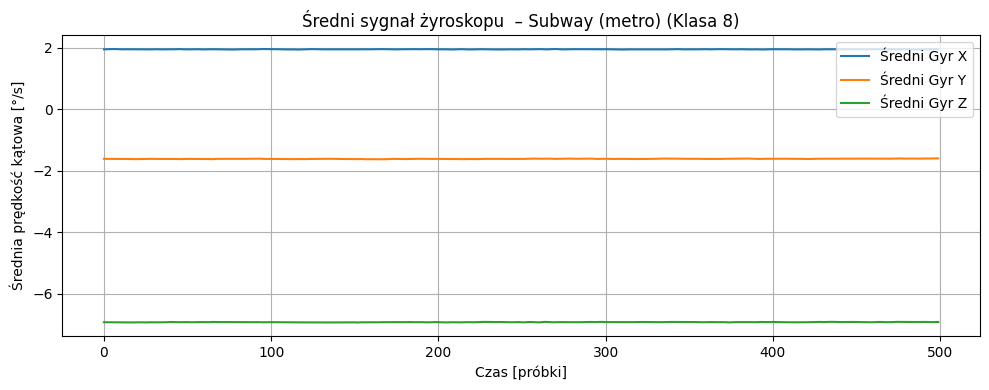

In [54]:
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]
    class_samples=acc[indices]
    mean_signal = np.mean(class_samples, axis=0)
    std_signal = np.std(class_samples, axis=0)
    activity_name = label_names.get(class_label, f"Klasa {class_label}")
    plt.figure(figsize=(10, 4))
    plt.plot(mean_signal[0], label='Średni Gyr X')
    plt.plot(mean_signal[1], label='Średni Gyr Y')
    plt.plot(mean_signal[2], label='Średni Gyr Z')
    plt.title(f'Średni sygnał żyroskopu  – {activity_name} (Klasa {class_label})')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Średnia prędkość kątowa [°/s]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

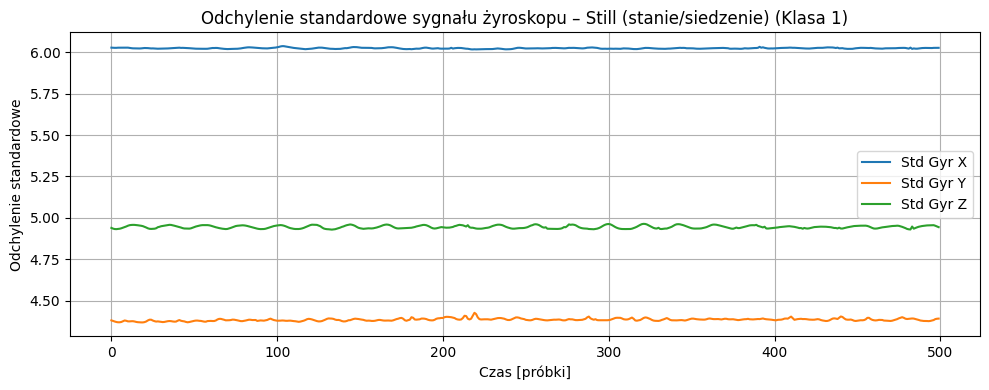

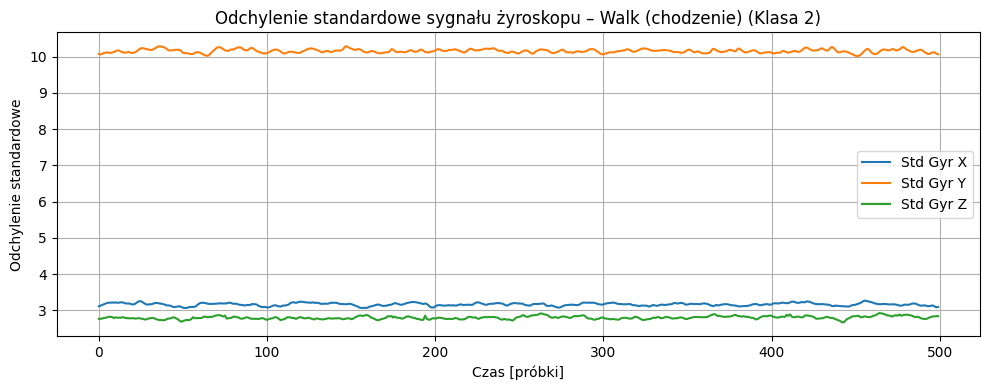

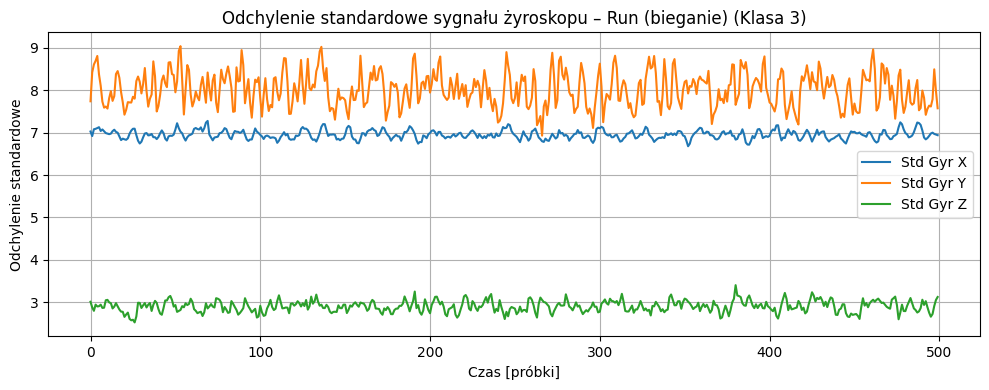

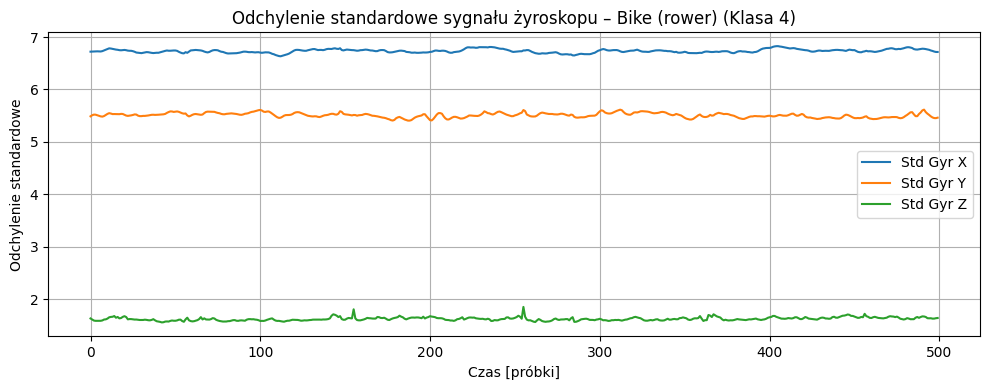

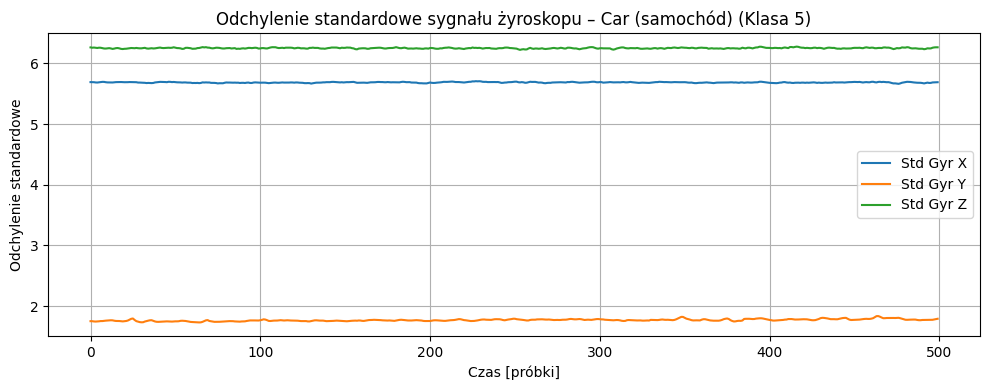

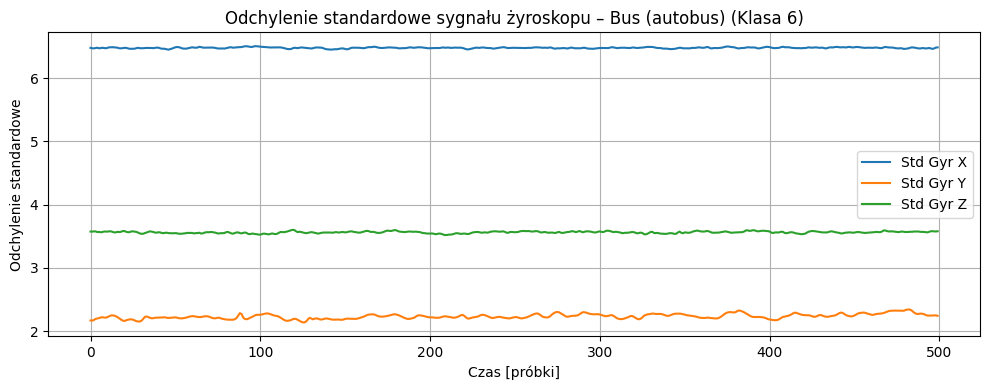

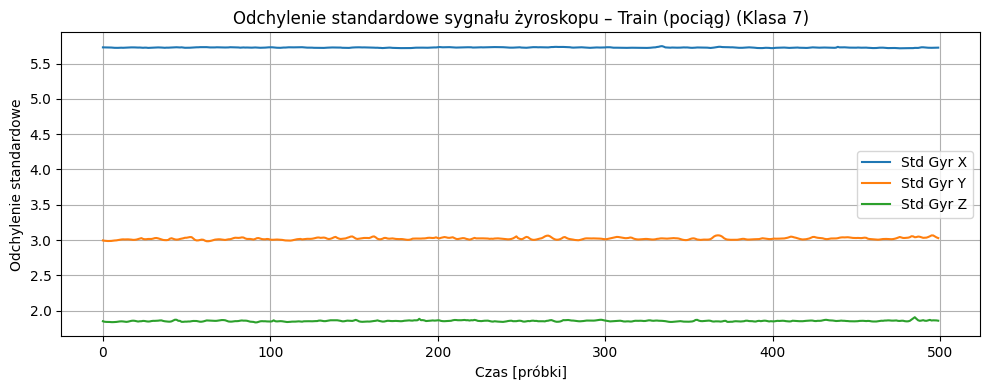

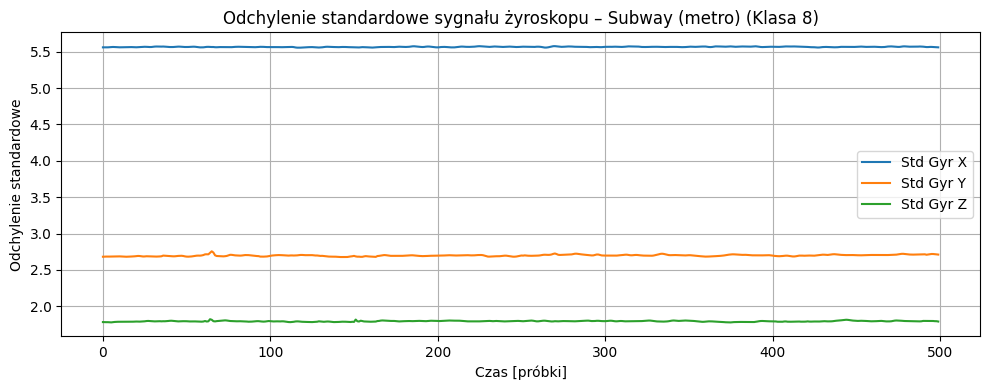

In [55]:
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]
    class_samples=acc[indices]
    mean_signal = np.mean(class_samples, axis=0)
    std_signal = np.std(class_samples, axis=0)
    activity_name = label_names.get(class_label, f"Klasa {class_label}")  
    
    plt.figure(figsize=(10, 4))
    plt.plot(std_signal[0], label='Std Gyr X')
    plt.plot(std_signal[1], label='Std Gyr Y')
    plt.plot(std_signal[2], label='Std Gyr Z')
    plt.title(f'Odchylenie standardowe sygnału żyroskopu – {activity_name} (Klasa {class_label})')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Odchylenie standardowe')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

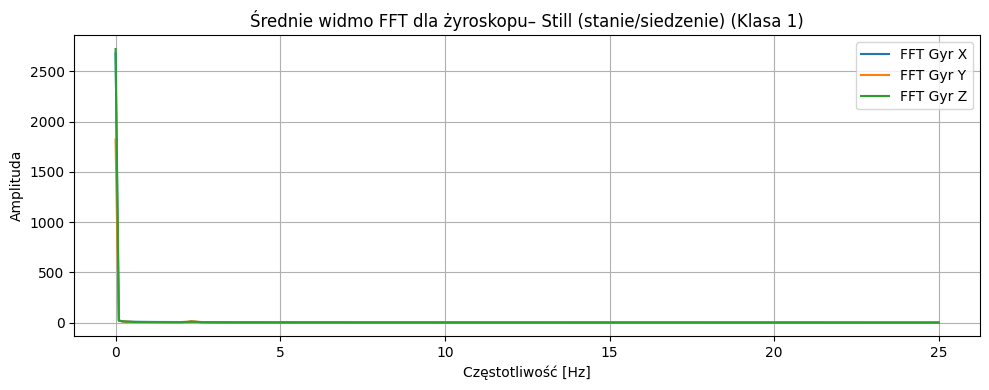

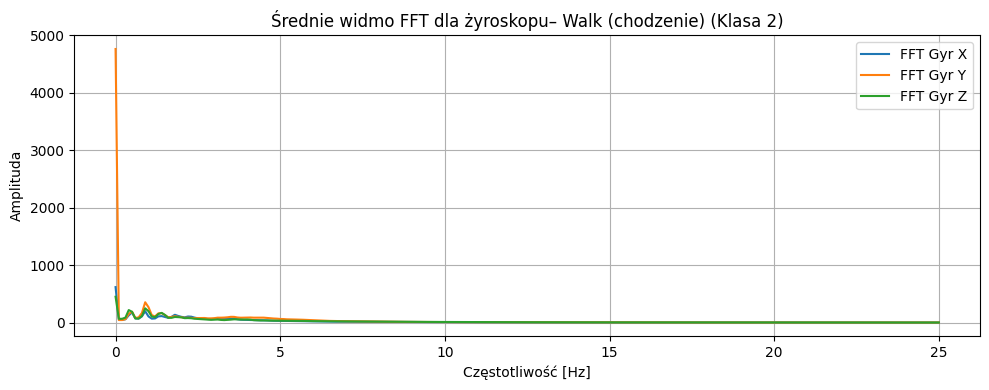

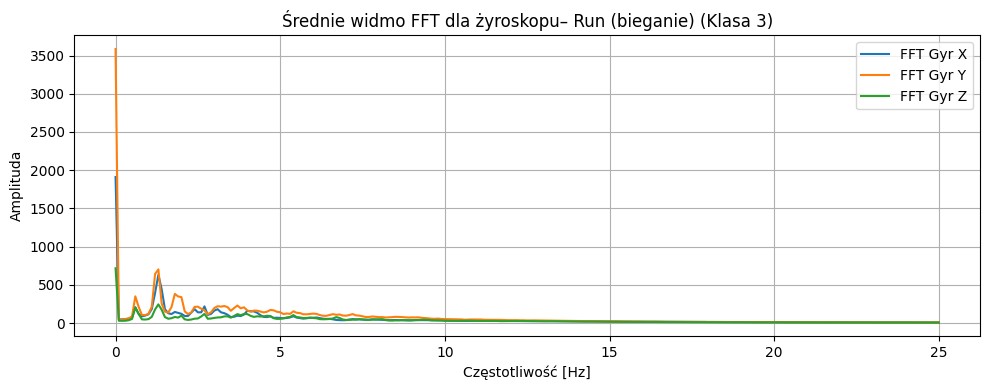

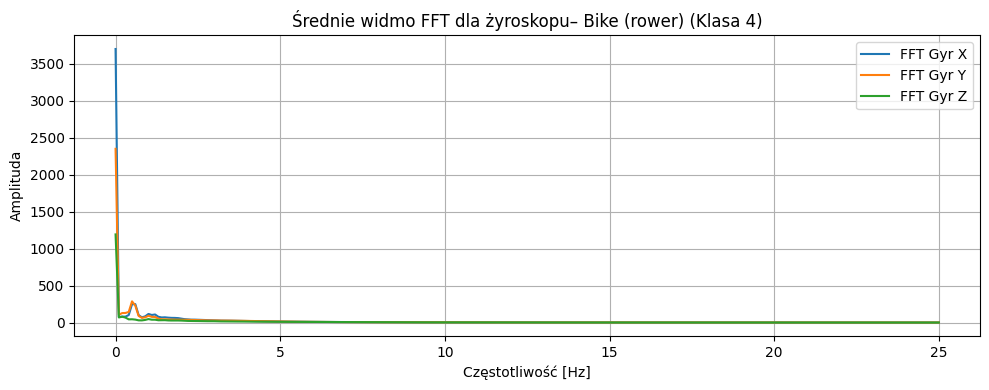

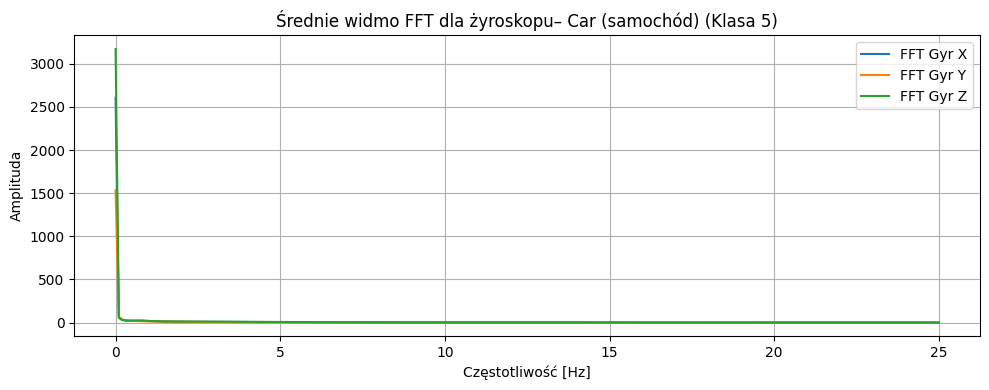

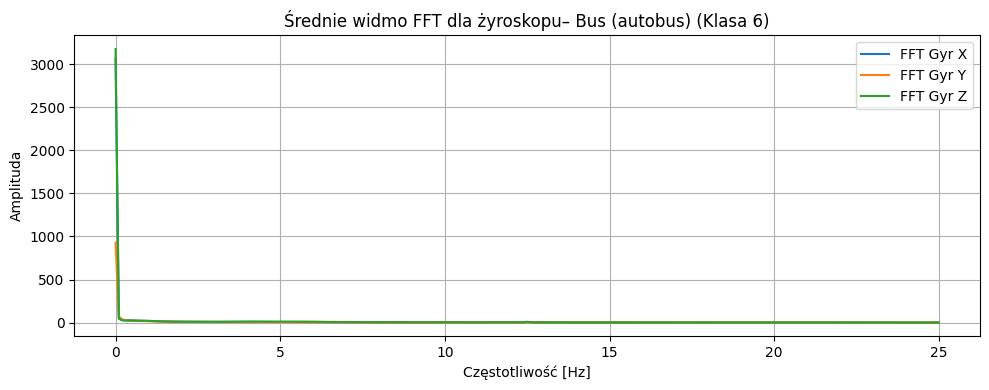

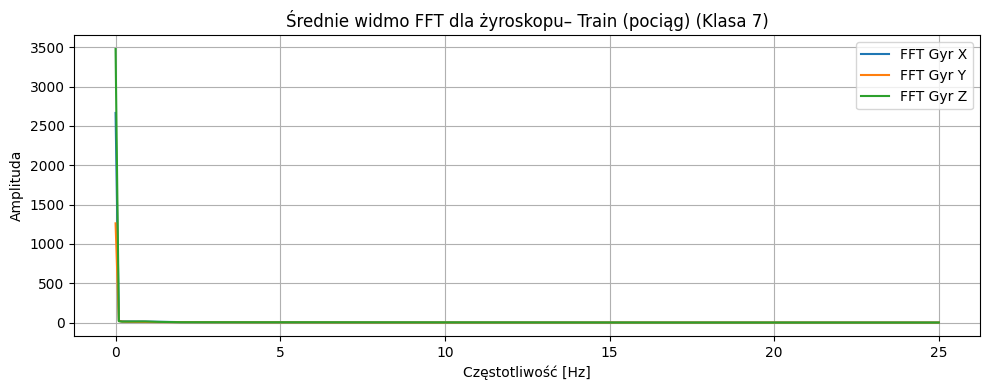

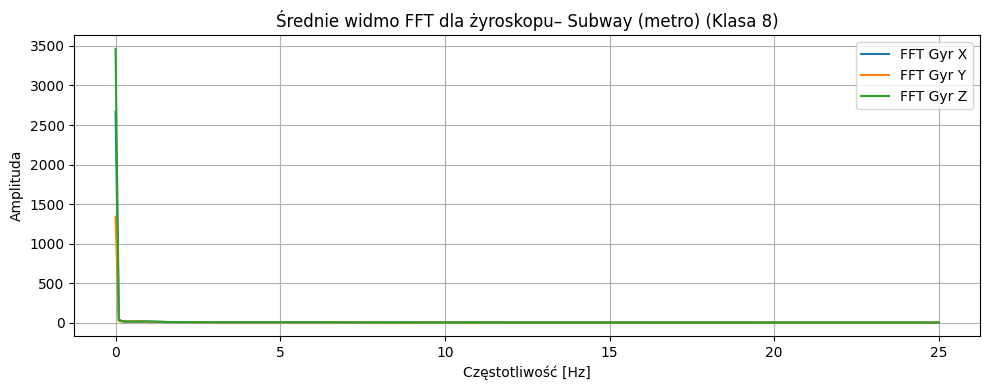

In [56]:
sampling_rate = 50  # Hz – przykładowo
N = acc.shape[2]    # liczba próbek czasowych (500)

freqs = rfftfreq(N, d=1/sampling_rate)  


for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]
    if len(indices) == 0:
        continue

    class_samples = acc[indices] 
    fft_magnitudes = []

    for sample in class_samples:
        axis_ffts = []
        for axis_signal in sample:  
            fft_vals = np.abs(rfft(axis_signal)) 
            axis_ffts.append(fft_vals)
        fft_magnitudes.append(axis_ffts)

    fft_magnitudes = np.array(fft_magnitudes)  
    mean_fft = np.mean(fft_magnitudes, axis=0) 

    plt.figure(figsize=(10, 4))
    axes = ['X', 'Y', 'Z']
    for i in range(3):
        plt.plot(freqs, mean_fft[i], label=f'FFT Gyr {axes[i]}')
    
    plt.title(f'Średnie widmo FFT dla żyroskopu– {label_names[class_label]} (Klasa {class_label})')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

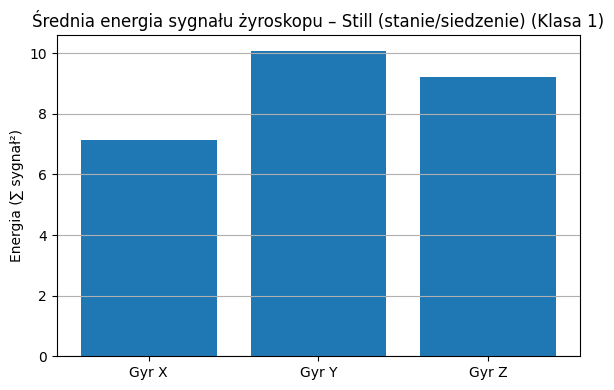

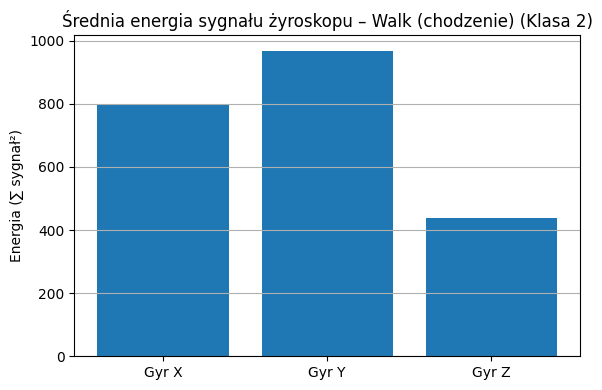

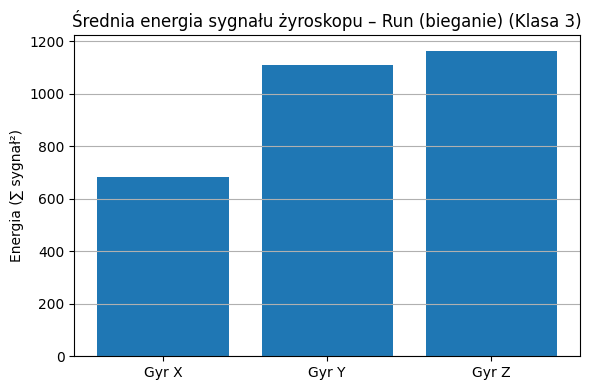

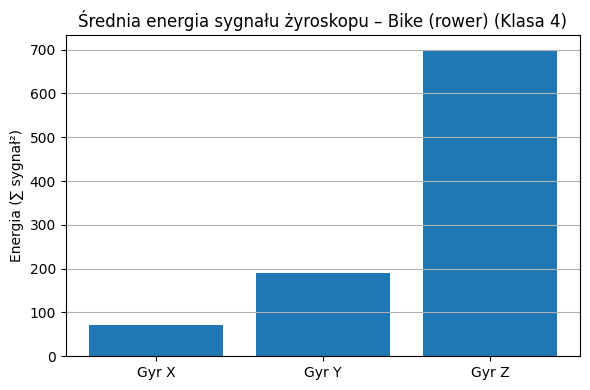

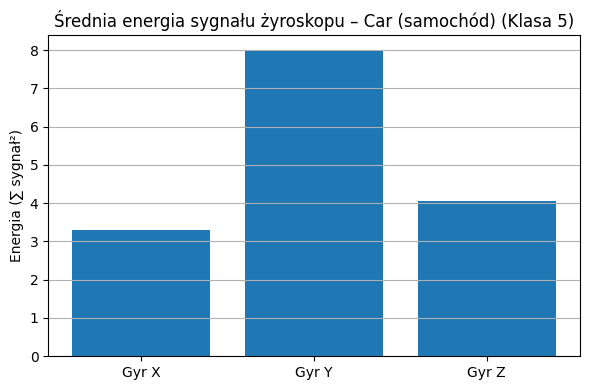

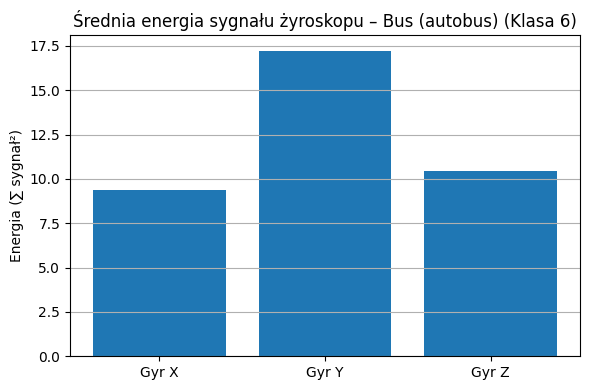

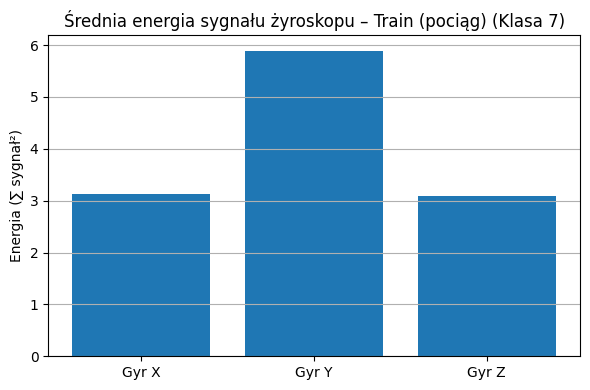

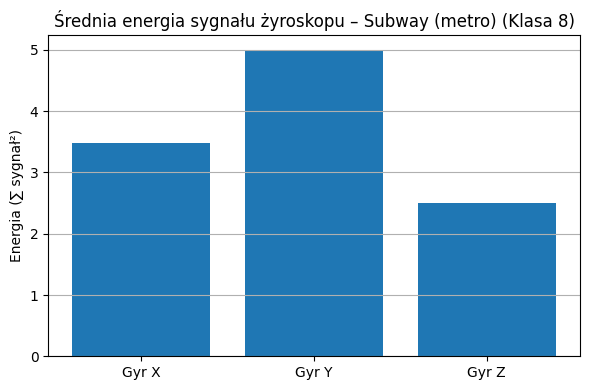

In [57]:
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]    
    class_samples = gyr[indices]  

    energies = []
    for axis in range(3):  # X, Y, Z
        axis_signals = class_samples[:, axis, :]  
        axis_energy = np.sum(axis_signals ** 2, axis=1)  
        mean_energy = np.mean(axis_energy)
        energies.append(mean_energy)

    activity_name = label_names.get(class_label, f"Klasa {class_label}")
    
    # Wykres słupkowy energii
    plt.figure(figsize=(6, 4))
    plt.bar(['Gyr X', 'Gyr Y', 'Gyr Z'], energies)
    plt.title(f'Średnia energia sygnału żyroskopu – {activity_name} (Klasa {class_label})')
    plt.ylabel('Energia (∑ sygnał²)')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# Analiza dla magnetometru

In [58]:
Mag_x = np.loadtxt('/Users/paulinawor/Documents/konkurs/Hips/Mag_x.txt')
Mag_y = np.loadtxt('/Users/paulinawor/Documents/konkurs/Hips/Mag_y.txt')
Mag_z = np.loadtxt('/Users/paulinawor/Documents/konkurs/Hips/Mag_z.txt')

mag = np.stack([Mag_x, Mag_y, Mag_z], axis=1)

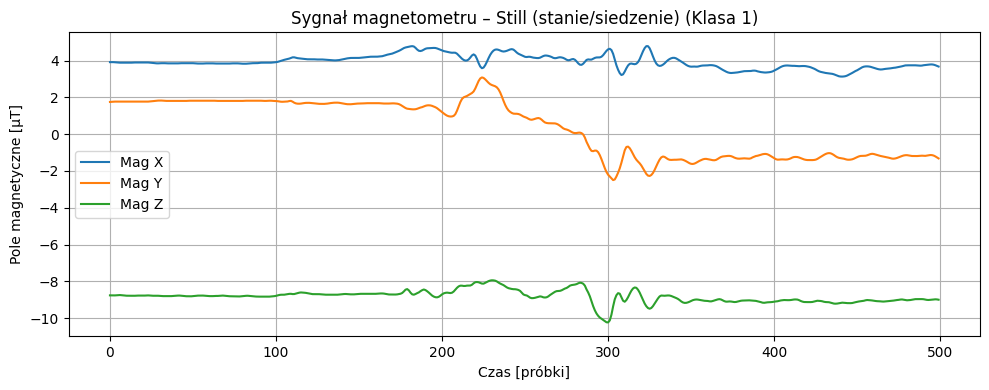

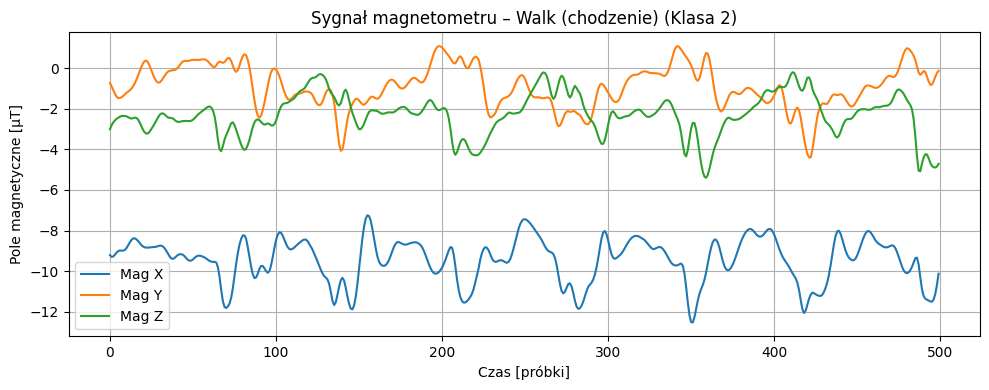

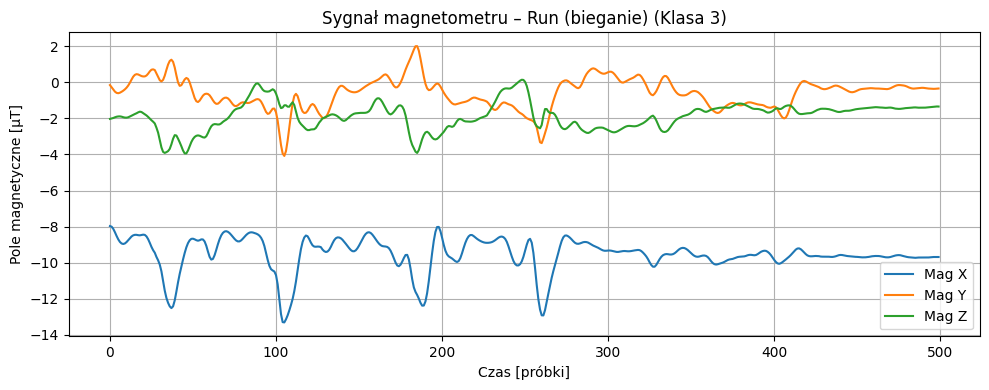

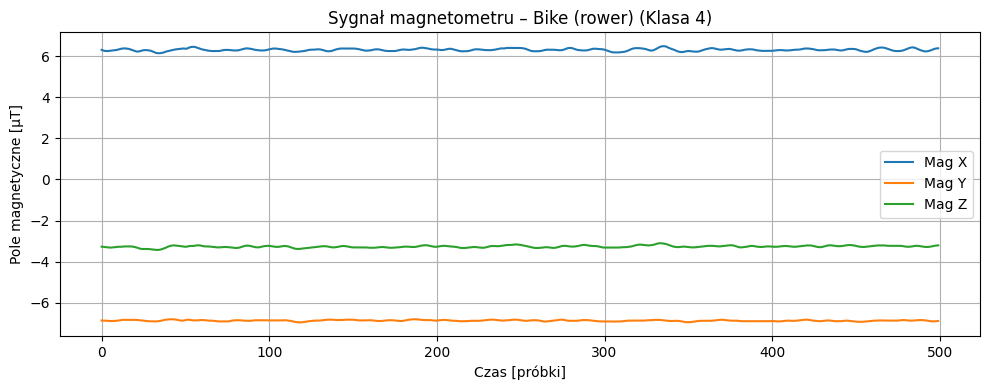

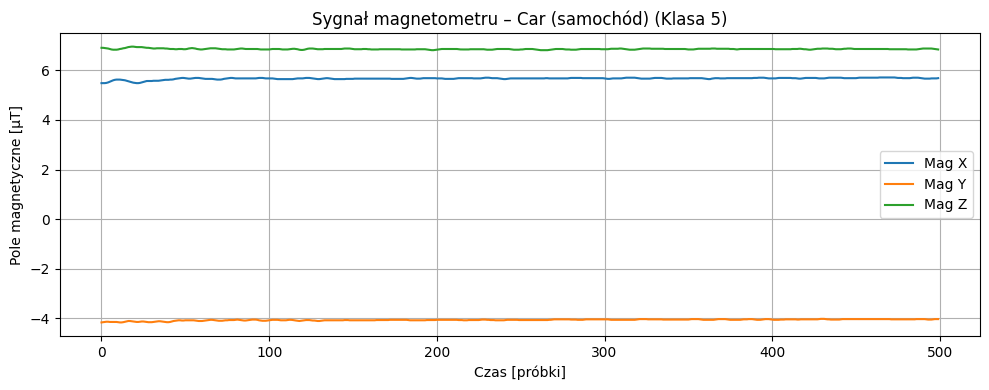

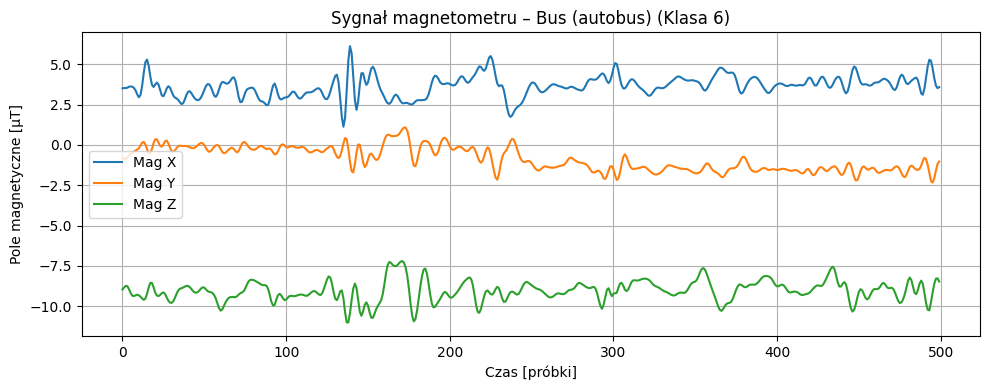

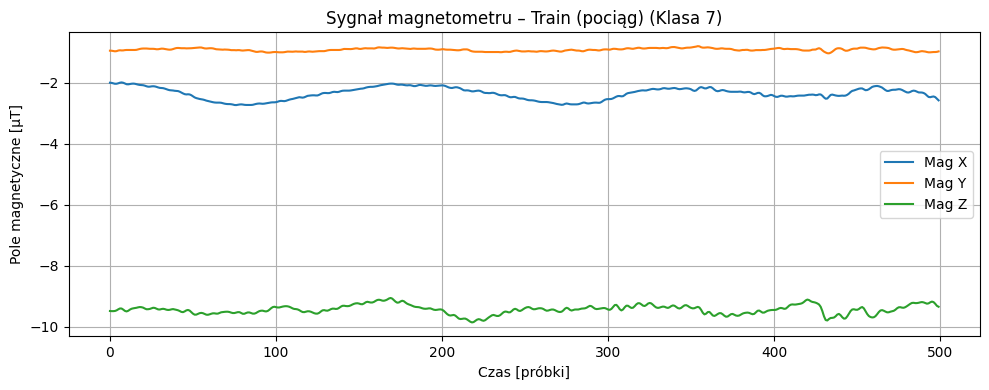

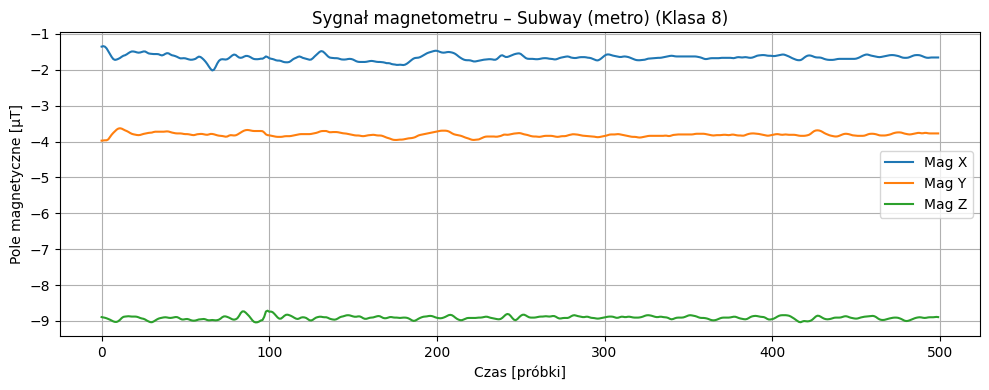

In [59]:
class_indices = {}
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]    
    idx = indices[0]
    sample = acc[idx]

    plt.figure(figsize=(10, 4))
    plt.plot(sample[0], label='Mag X')
    plt.plot(sample[1], label='Mag Y')
    plt.plot(sample[2], label='Mag Z')
    activity_name = label_names.get(class_label, f"Klasa {class_label}")
    plt.title(f'Sygnał magnetometru – {activity_name} (Klasa {class_label})')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Pole magnetyczne [µT]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

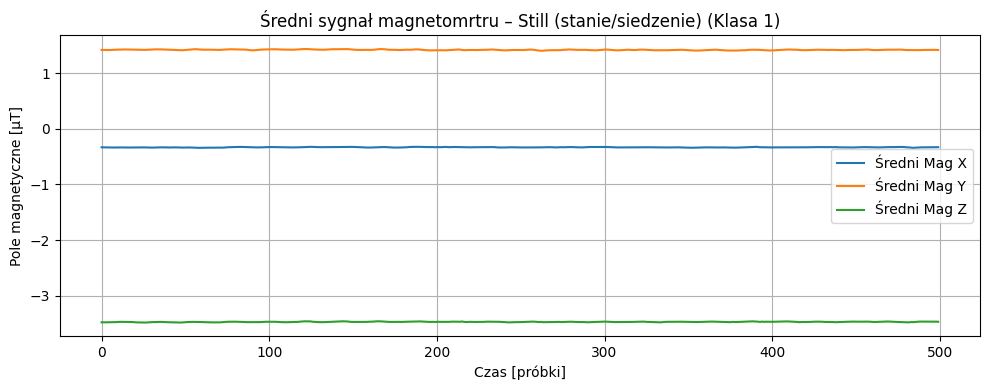

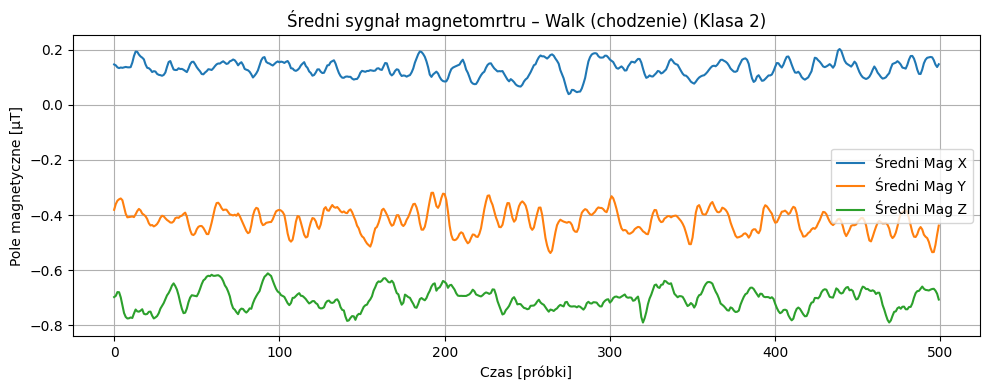

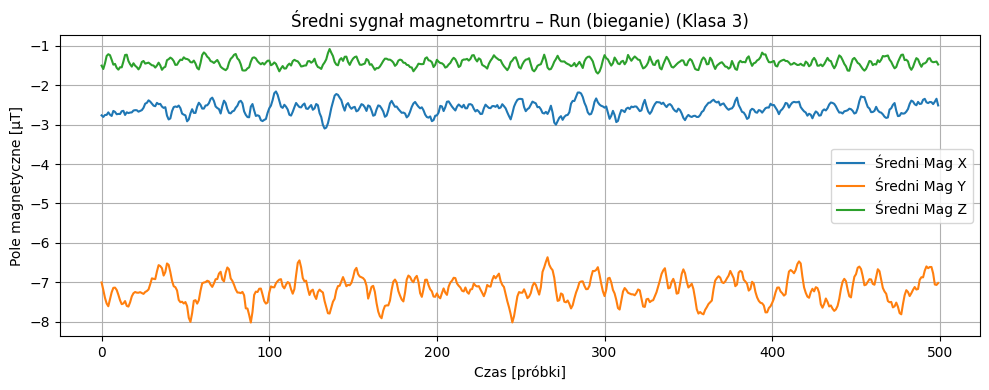

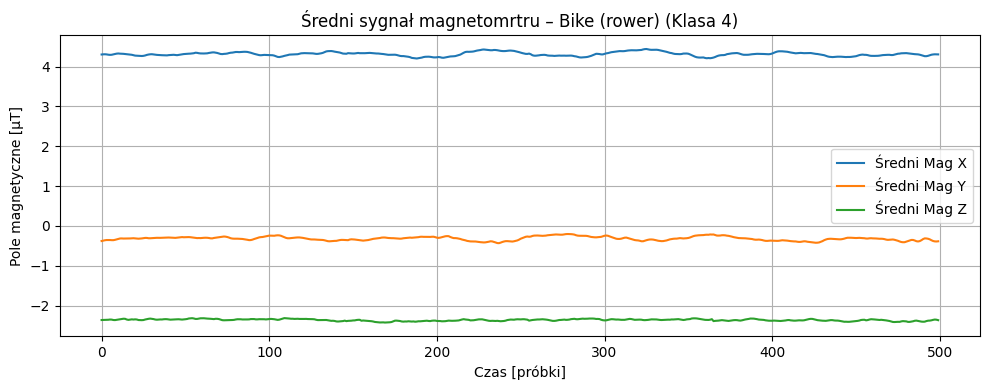

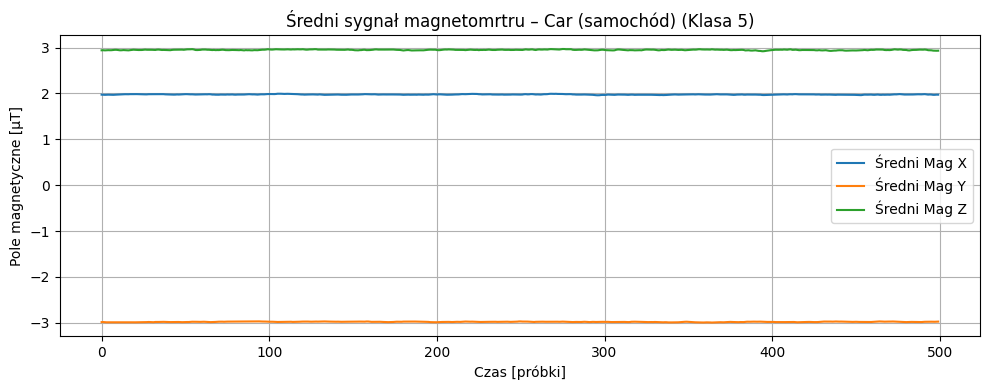

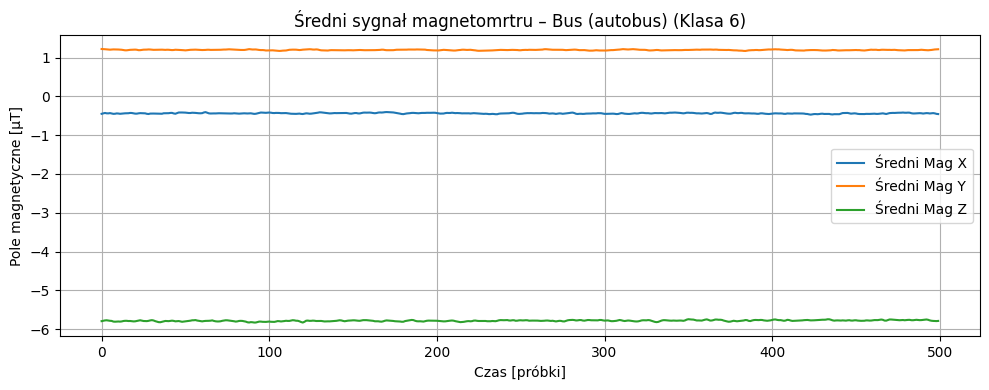

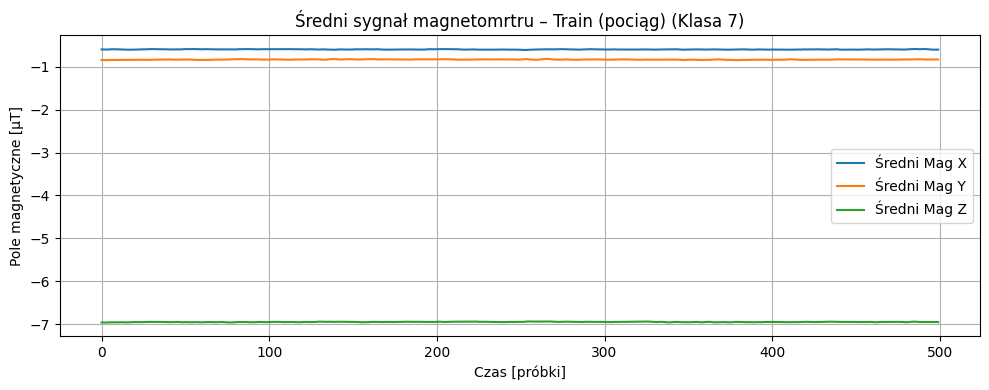

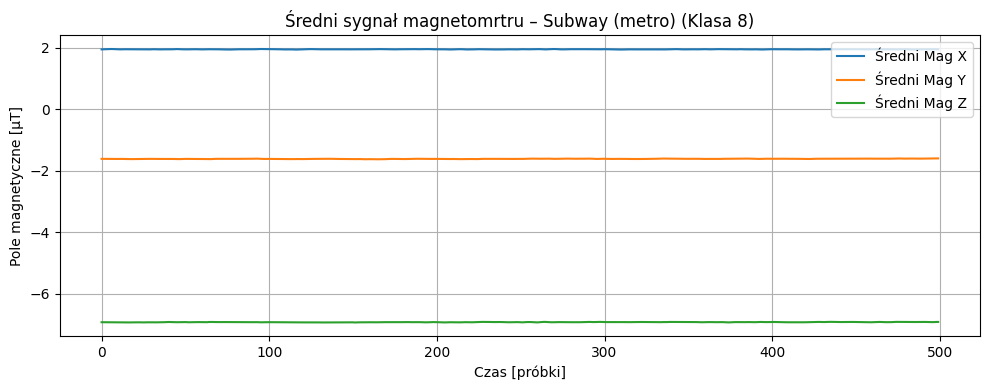

In [60]:
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]
    class_samples=acc[indices]
    mean_signal = np.mean(class_samples, axis=0)
    std_signal = np.std(class_samples, axis=0)
    activity_name = label_names.get(class_label, f"Klasa {class_label}")
    plt.figure(figsize=(10, 4))
    plt.plot(mean_signal[0], label='Średni Mag X')
    plt.plot(mean_signal[1], label='Średni Mag Y')
    plt.plot(mean_signal[2], label='Średni Mag Z')
    plt.title(f'Średni sygnał magnetomrtru – {activity_name} (Klasa {class_label})')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Pole magnetyczne [µT]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

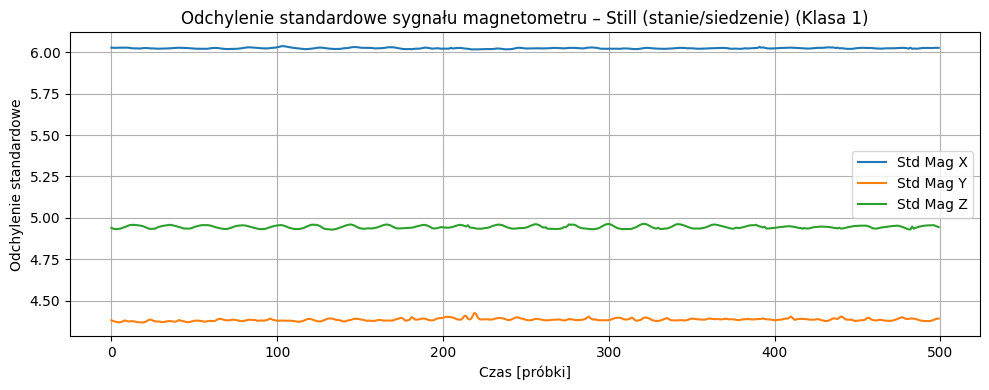

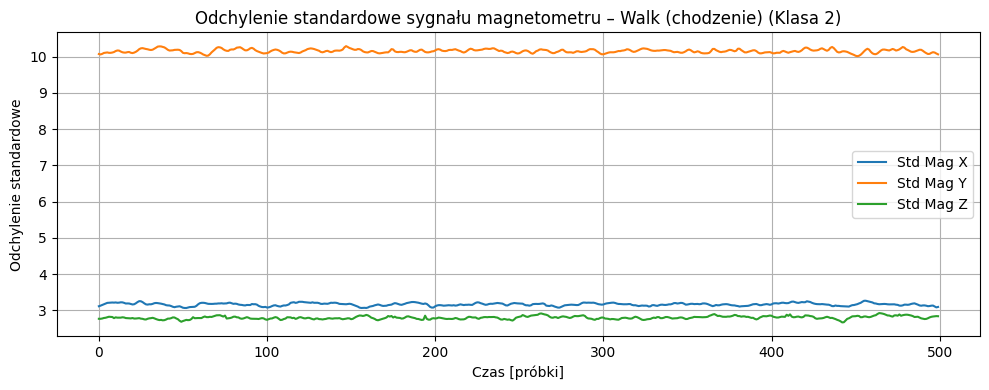

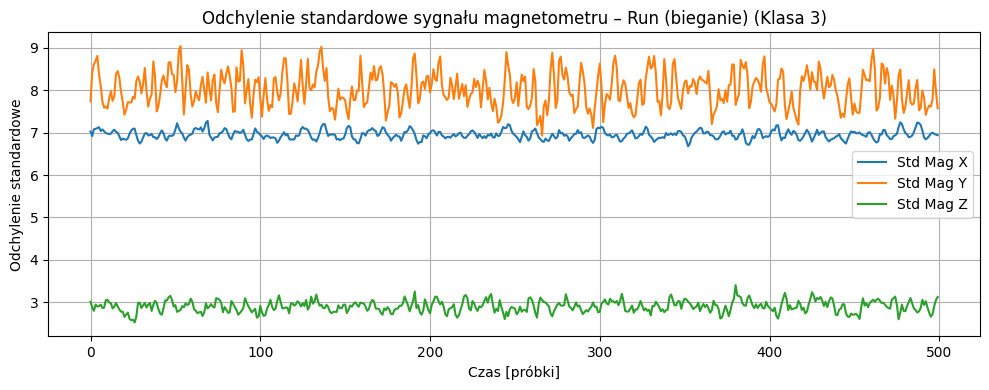

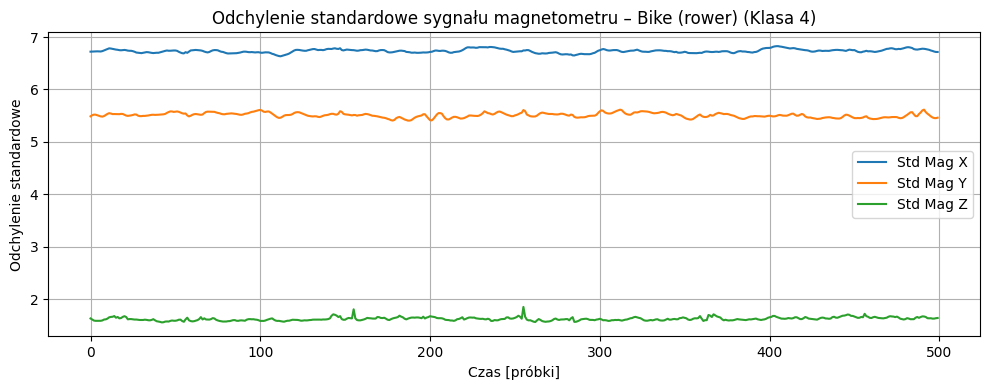

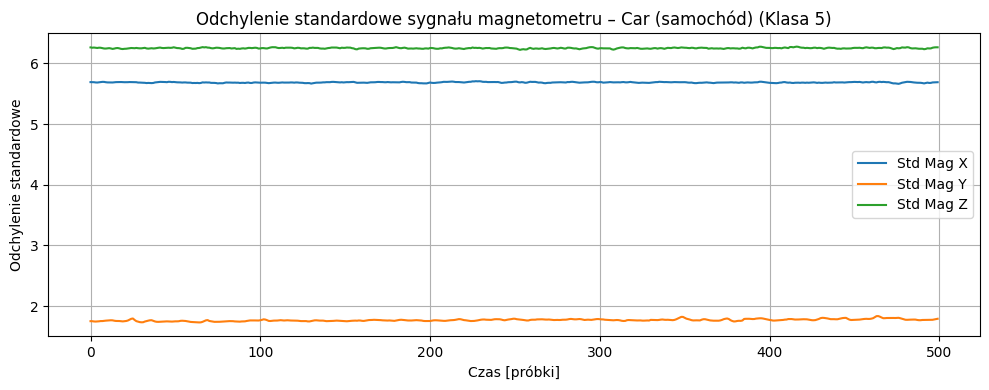

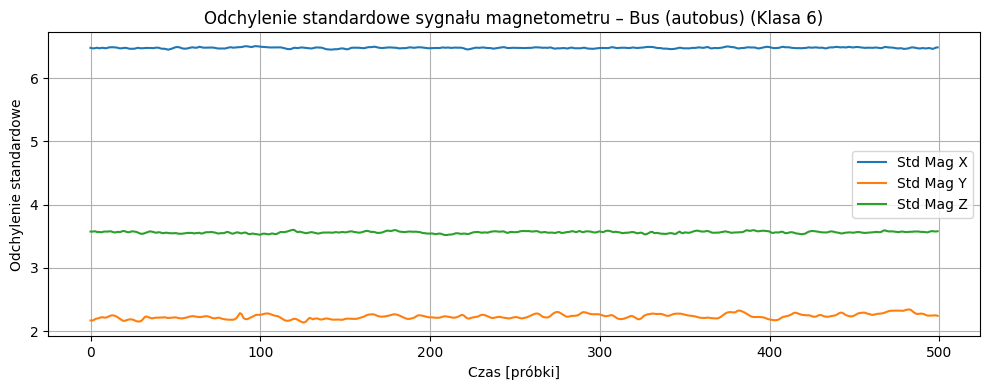

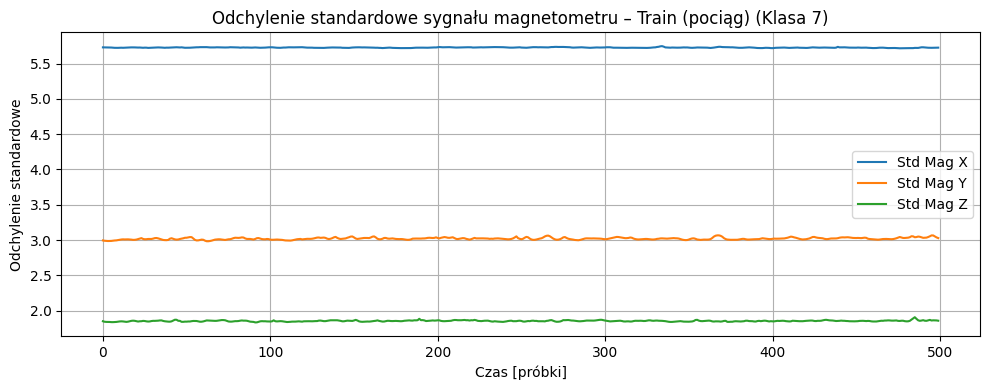

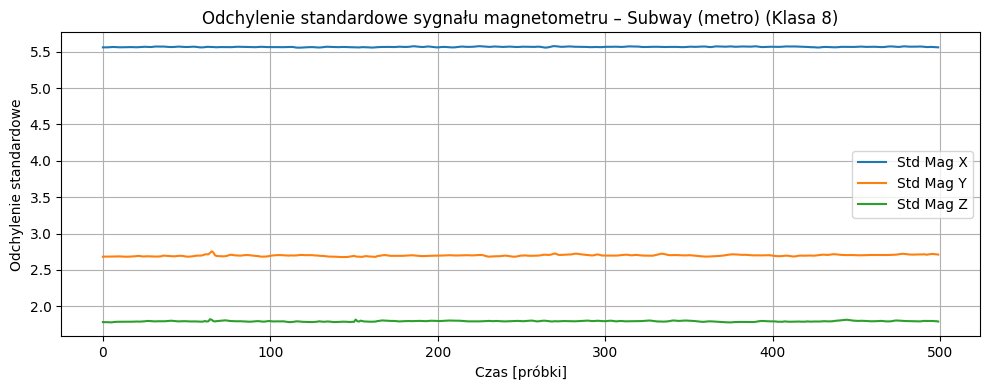

In [61]:
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]
    class_samples=acc[indices]
    mean_signal = np.mean(class_samples, axis=0)
    std_signal = np.std(class_samples, axis=0)
    activity_name = label_names.get(class_label, f"Klasa {class_label}")  
    
    plt.figure(figsize=(10, 4))
    plt.plot(std_signal[0], label='Std Mag X')
    plt.plot(std_signal[1], label='Std Mag Y')
    plt.plot(std_signal[2], label='Std Mag Z')
    plt.title(f'Odchylenie standardowe sygnału magnetometru – {activity_name} (Klasa {class_label})')
    plt.xlabel('Czas [próbki]')
    plt.ylabel('Odchylenie standardowe')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

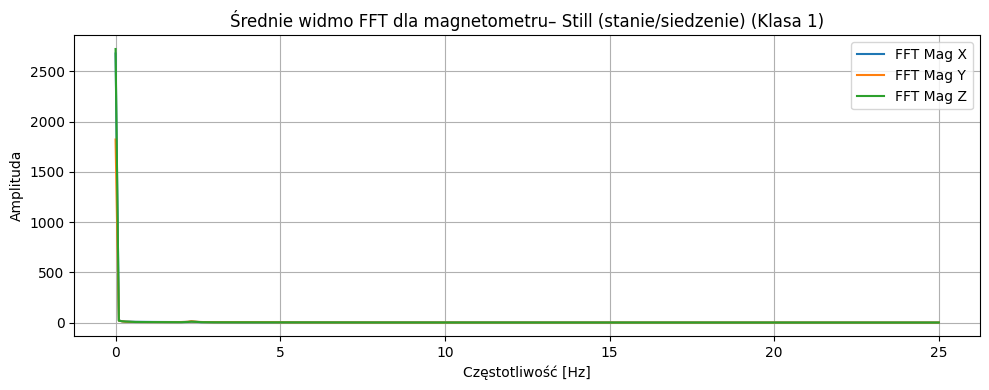

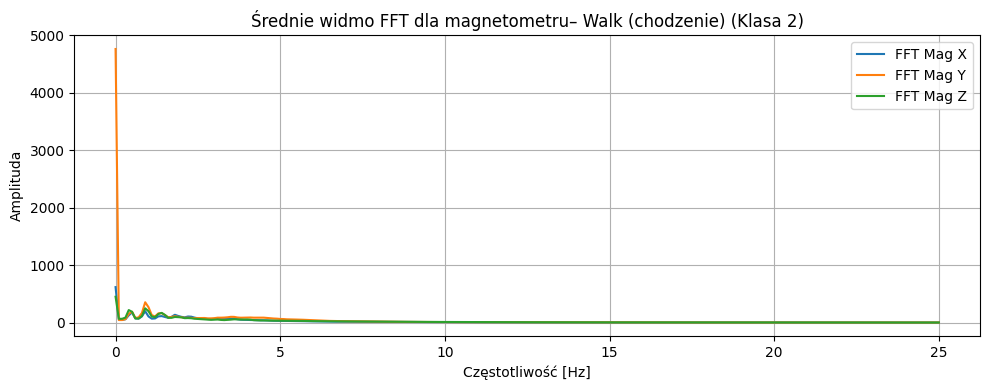

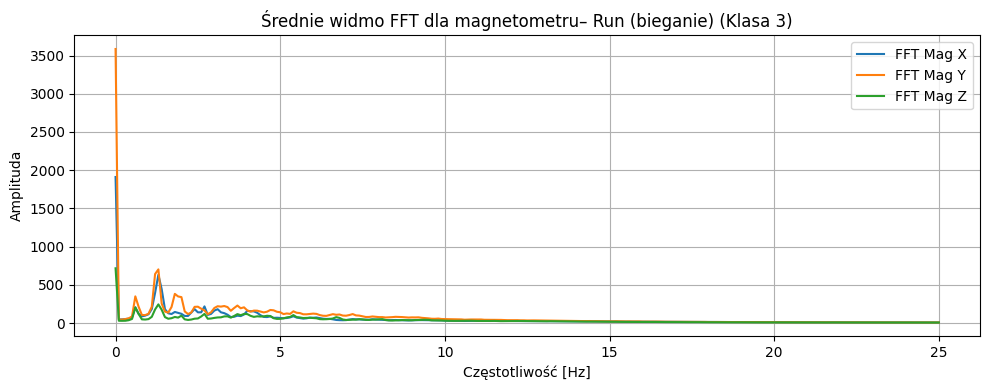

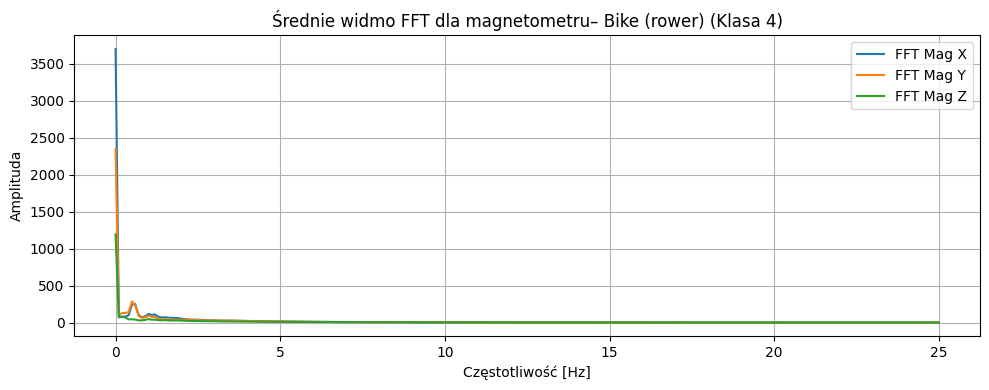

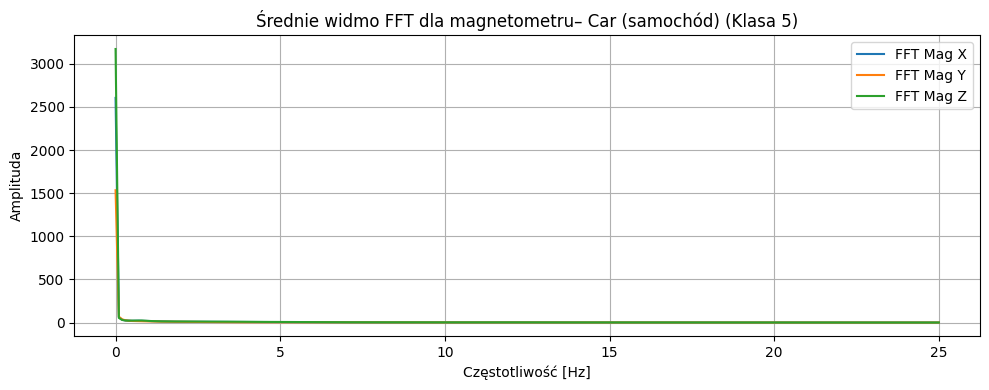

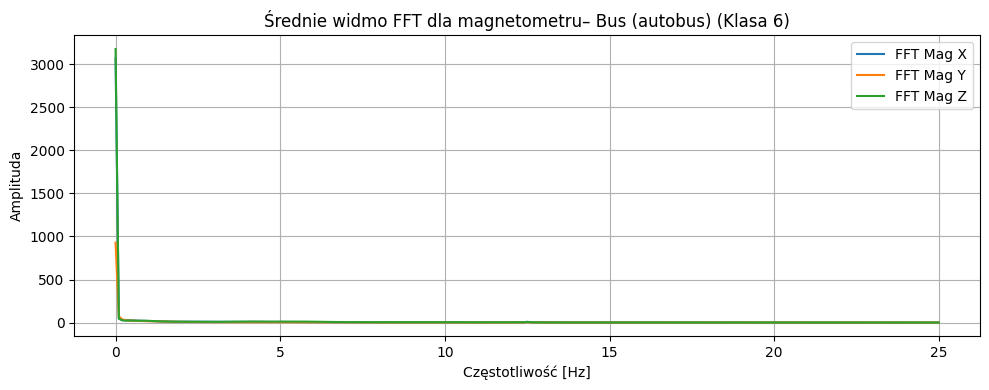

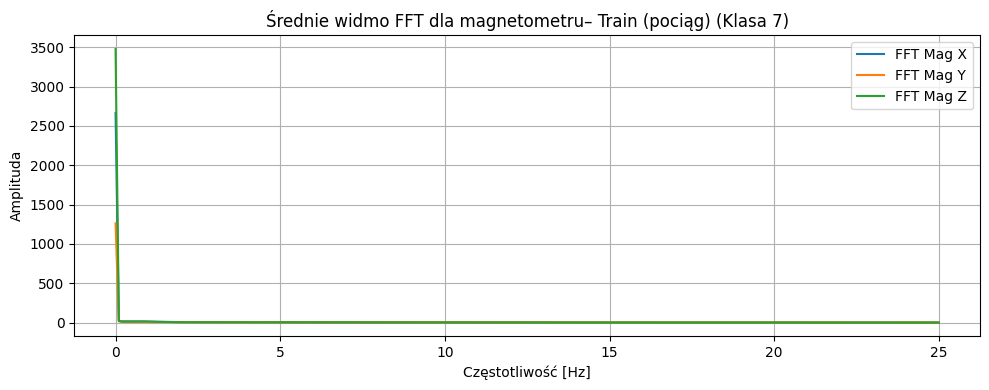

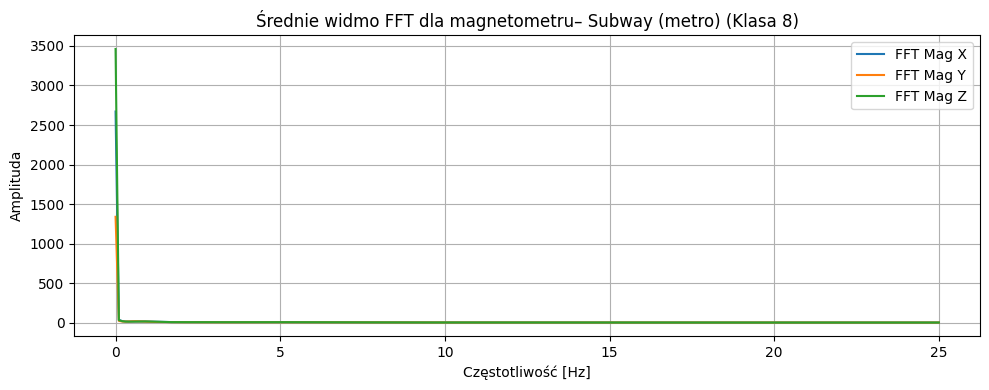

In [62]:
sampling_rate = 50  # Hz – przykładowo
N = acc.shape[2]    # liczba próbek czasowych (500)

freqs = rfftfreq(N, d=1/sampling_rate)  


for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]
    if len(indices) == 0:
        continue

    class_samples = acc[indices] 
    fft_magnitudes = []

    for sample in class_samples:
        axis_ffts = []
        for axis_signal in sample:  
            fft_vals = np.abs(rfft(axis_signal)) 
            axis_ffts.append(fft_vals)
        fft_magnitudes.append(axis_ffts)

    fft_magnitudes = np.array(fft_magnitudes)  
    mean_fft = np.mean(fft_magnitudes, axis=0) 

    plt.figure(figsize=(10, 4))
    axes = ['X', 'Y', 'Z']
    for i in range(3):
        plt.plot(freqs, mean_fft[i], label=f'FFT Mag {axes[i]}')
    
    plt.title(f'Średnie widmo FFT dla magnetometru– {label_names[class_label]} (Klasa {class_label})')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

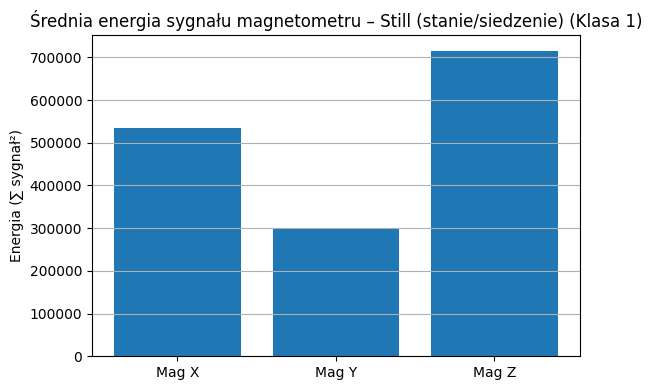

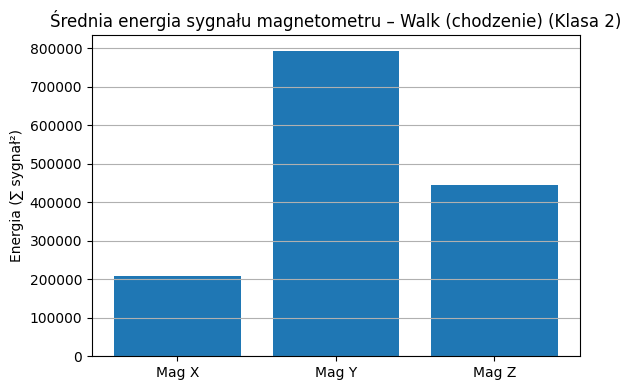

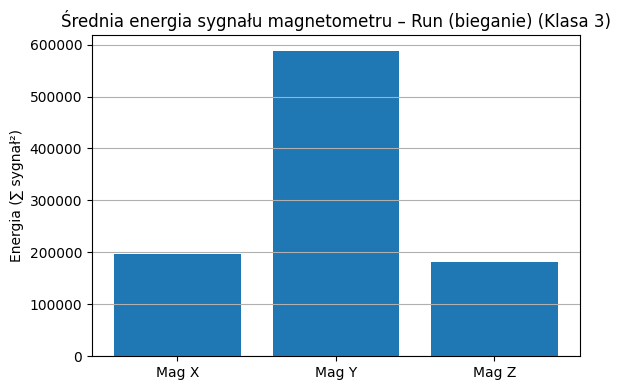

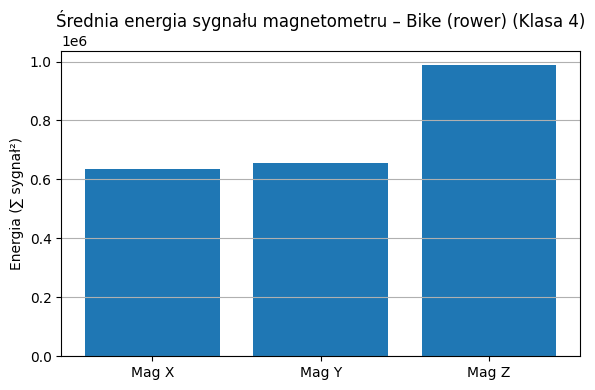

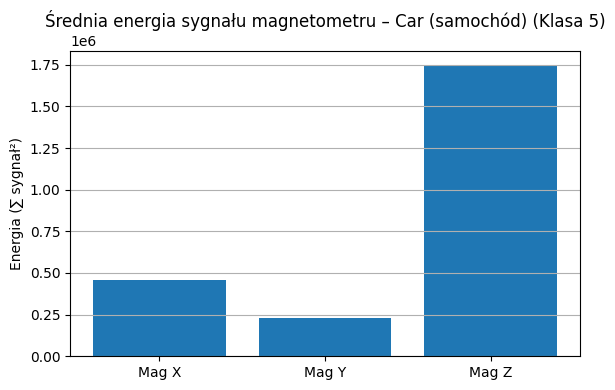

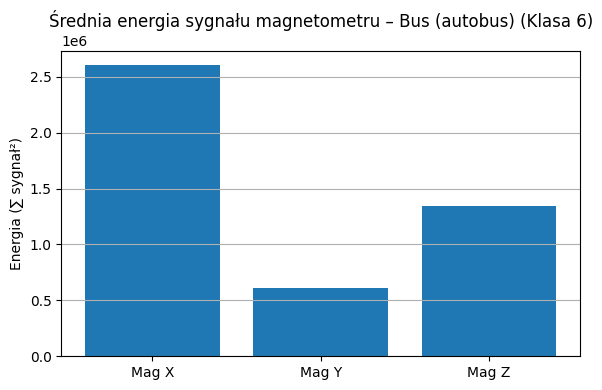

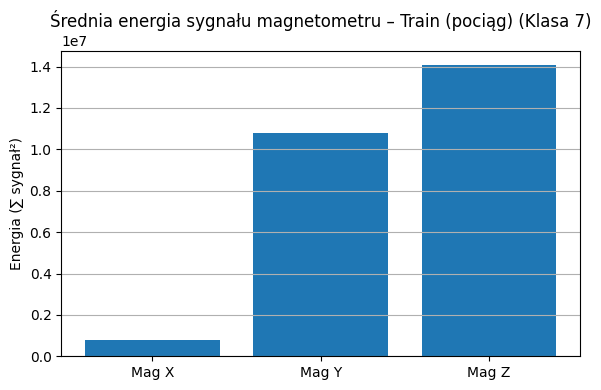

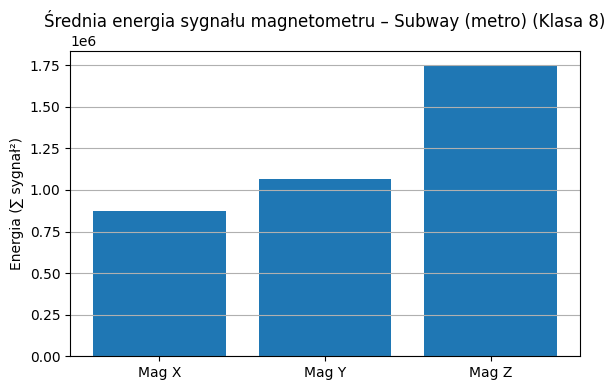

In [63]:
for class_label in sorted(unique_labels):
    indices = np.where(labels == class_label)[0]    
    class_samples = mag[indices]  

    energies = []
    for axis in range(3): 
        axis_signals = class_samples[:, axis, :] 
        axis_energy = np.sum(axis_signals ** 2, axis=1)  # energia dla każdej próbki
        mean_energy = np.mean(axis_energy)
        energies.append(mean_energy)

    activity_name = label_names.get(class_label, f"Klasa {class_label}")
    
    plt.figure(figsize=(6, 4))
    plt.bar(['Mag X', 'Mag Y', 'Mag Z'], energies)
    plt.title(f'Średnia energia sygnału magnetometru – {activity_name} (Klasa {class_label})')
    plt.ylabel('Energia (∑ sygnał²)')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()